# Сборный проект 2. Data Science в промышленности

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Описание данных

### Технологический процесс

* **Rougher feed** — исходное сырье
* **Rougher additions** (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* **Xanthate** — ксантогенат (промотер, или активатор флотации);
* **Sulphate** — сульфат (на данном производстве сульфид натрия);
* **Depressant** — депрессант (силикат натрия).
* **Rougher process** (англ. «грубый процесс») — флотация
* **Rougher tails** — отвальные хвосты
* **Float banks** — флотационная установка
* **Cleaner process** — очистка
* **Rougher Au** — черновой концентрат золота
* **Final Au** — финальный концентрат золота

### Параметры этапов

* **air amount** — объём воздуха
* **fluid levels** — уровень жидкости
* **feed size** — размер гранул сырья
* **feed rate** — скорость подачи

## Наименование признаков

Наименование признаков должно быть такое:  
[этап].[тип_параметра].[название_параметра]  
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока [тип_параметра]:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

## Расчёт эффективности

Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.  
Эффективность обогащения рассчитывается по формуле

$Recovery = \Large\frac{C * (F - T)}{F * (C - T)} \normalsize* 100\%$

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

## Метрика качества

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).  
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.  
Метрика sMAPE вычисляется так:

$sMAPE = \Large\frac{1}{N}\normalsize\displaystyle\sum_{i=1}^{N} \frac{2 * |y_i - \widehat{y}_i|}{|y_i| + |\widehat{y}_i|} * 100\%$

где:
* $y_i$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество;
* $\widehat{y}_i$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;
* $N$ - количество объектов в выборке.

Нужно спрогнозировать сразу две величины:  
1. эффективность обогащения чернового концентрата rougher.output.recovery;
2. эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

$sMAPE\_final = 25\% * sMAPE(rougher) + 75\% * sMAPE(final)$

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Технологический-процесс" data-toc-modified-id="Технологический-процесс-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Технологический процесс</a></span></li><li><span><a href="#Параметры-этапов" data-toc-modified-id="Параметры-этапов-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Параметры этапов</a></span></li></ul></li><li><span><a href="#Наименование-признаков" data-toc-modified-id="Наименование-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Наименование признаков</a></span></li><li><span><a href="#Расчёт-эффективности" data-toc-modified-id="Расчёт-эффективности-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расчёт эффективности</a></span></li><li><span><a href="#Метрика-качества" data-toc-modified-id="Метрика-качества-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Метрика качества</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-файлов-и-первичный-анализ-данных" data-toc-modified-id="Чтение-файлов-и-первичный-анализ-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Чтение файлов и первичный анализ данных</a></span></li><li><span><a href="#Проверка-корректности-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-корректности-расчёта-эффективности-обогащения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка корректности расчёта эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Анализ-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-метрики-качества" data-toc-modified-id="Функция-для-вычисления-метрики-качества-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для вычисления метрики качества</a></span></li><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Отбор признаков</a></span></li><li><span><a href="#Построение-бейслайнов" data-toc-modified-id="Построение-бейслайнов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Построение бейслайнов</a></span></li><li><span><a href="#Оптимизация-гиперпараметров" data-toc-modified-id="Оптимизация-гиперпараметров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оптимизация гиперпараметров</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Подготовка данных

## Чтение файлов и первичный анализ данных

Импортируем необходимые библиотеки.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

Объявим и проинициализируем константы.

In [2]:
RANDOM_STATE = 17

BOLD = '\033[1m'
END = '\033[0m'

Загрузим данные и отобразим первые пять строк, чтобы удостовериться в корректности процедуры. При чтении csv-файла будем использовать автоматическое определение разделителя с помощью движка python.

In [3]:
train_df = pd.read_csv('datasets/gold_recovery_train.csv', sep=None, engine='python')
test_df = pd.read_csv('datasets/gold_recovery_test.csv', sep=None, engine='python')
full_df = pd.read_csv('datasets/gold_recovery_full.csv', sep=None, engine='python')

train_df.name = 'Gold recovery train dataframe'
test_df.name = 'Gold recovery test dataframe'
full_df.name = 'Gold recovery full dataframe'

display(train_df.head())
display(test_df.head())
display(full_df.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Данные загружены корректно.

Посмотрим на общую информацию о данных, в т.ч. на количество пропусков.

In [4]:
def print_bold(text):
    print(BOLD + text + END)
    

df_list = [train_df, test_df, full_df]

for df in df_list:
    print_bold(df.name)
    print(df.info(memory_usage='deep'))
    print()

Gold recovery train dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                         

Датасет для обучения:
* состоит из 87 признаков и 16860 объектов;
* 86 признаков имеют тип с плавающей запятой, 1 - строковый (дата);
* есть пропуски данных.

Тестовый датасет:
* состоит из 53 признаков и 5856 объектов;
* 52 признака имеют тип с плавающей запятой, 1 - строковый (дата);
* есть пропуски данных.

Полный датасет:
* состоит из 87 признаков и 22716 объектов;
* 86 признаков имеют тип с плавающей запятой, 1 - строковый (дата);
* есть пропуски данных.

Заметим, что суммарное число объектов тренировочного и тестового датасетов равно длине полного датасета. Возможно, полный датасет был разделён на тренировочный и тестовый, проверим это предположение на распределении данных по датам.

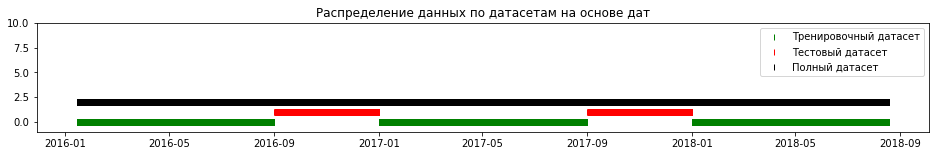

In [5]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d')
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%d')
full_df['date'] = pd.to_datetime(full_df['date'], format='%Y-%m-%d')

plt.figure(figsize=(16, 2))
plt.plot(train_df['date'], [0]*len(train_df), '|', color='g', label='Тренировочный датасет')
plt.plot(test_df['date'], [1]*len(test_df), '|', color='r', label='Тестовый датасет')
plt.plot(full_df['date'], [2]*len(full_df), '|', color='k', label='Полный датасет')

plt.ylim(-1, 10)
plt.legend()
plt.title('Распределение данных по датасетам на основе дат');

Как видно, тренировочный датасет был сформирован из трёх частей полного датасета, а тестовый - из оставшихся двух.

Чтобы полностью удостовериться, вычтем из множества дат полного датасета множество дат тренировочного и сравним с множеством дат тестового датасета.

In [6]:
set(full_df['date']) - set(train_df['date']) == set(test_df['date'])

True

Итак, полный датасет был разделён на тренировочный и тестовый.

Проверим полный датасет на дубликаты.

In [7]:
full_df.duplicated().sum()

0

Значит, в тренировочном и тестовом датасетах также нет дубликатов.

Изучим пропуски в данных более подробно.

Gold recovery train dataframe
                     Столбец                         Пропусков, %   Всего пропусков
date                                                    0.000             0       
final.output.concentrate_ag                             0.427             72      
final.output.concentrate_pb                             0.427             72      
final.output.concentrate_sol                            2.195            370      
final.output.concentrate_au                             0.421             71      
final.output.recovery                                   9.021            1521     
final.output.tail_ag                                    0.391             66      
final.output.tail_pb                                    1.085            183      
final.output.tail_sol                                   0.860            145      
final.output.tail_au                                    0.391             66      
primary_cleaner.input.sulfate                           

                     Столбец                         Пропусков, %   Всего пропусков
date                                                    0.000             0       
final.output.concentrate_ag                             0.392             89      
final.output.concentrate_pb                             0.383             87      
final.output.concentrate_sol                            1.695            385      
final.output.concentrate_au                             0.379             86      
final.output.recovery                                   8.641            1963     
final.output.tail_ag                                    0.365             83      
final.output.tail_pb                                    0.880            200      
final.output.tail_sol                                   1.193            271      
final.output.tail_au                                    0.357             81      
primary_cleaner.input.sulfate                           7.083            1609     
pri

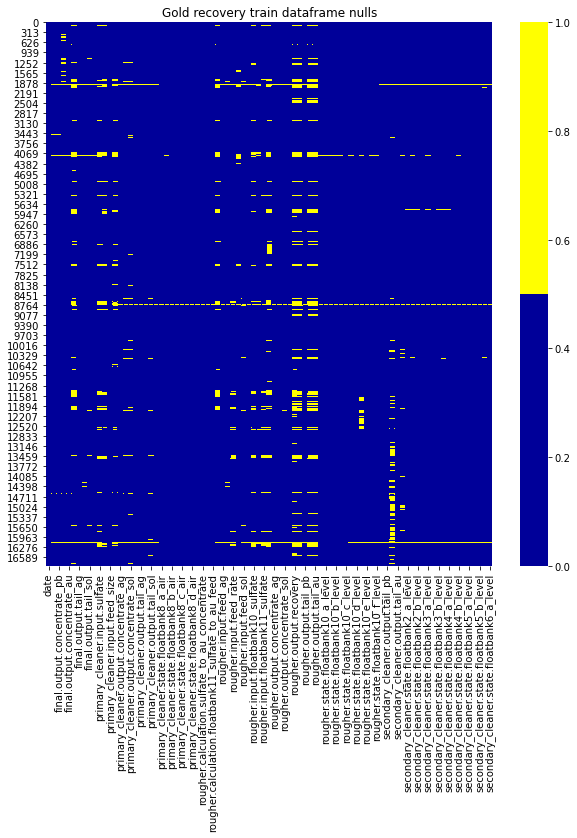

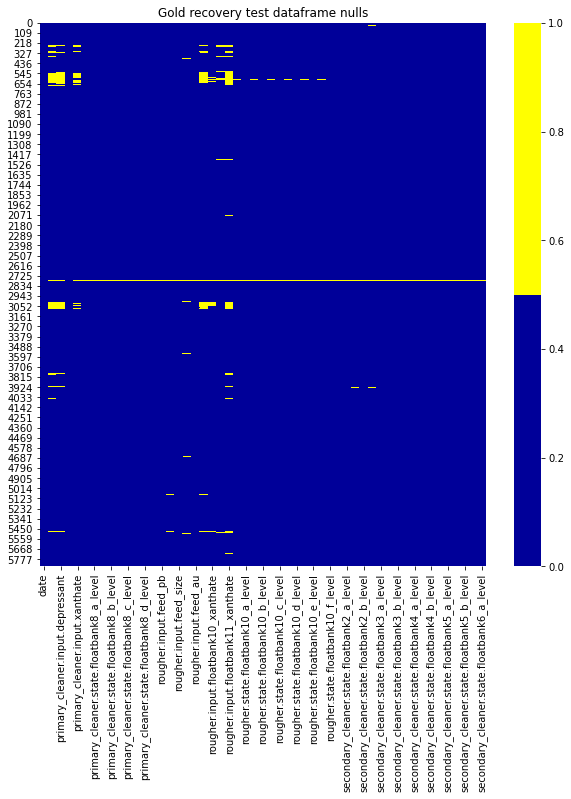

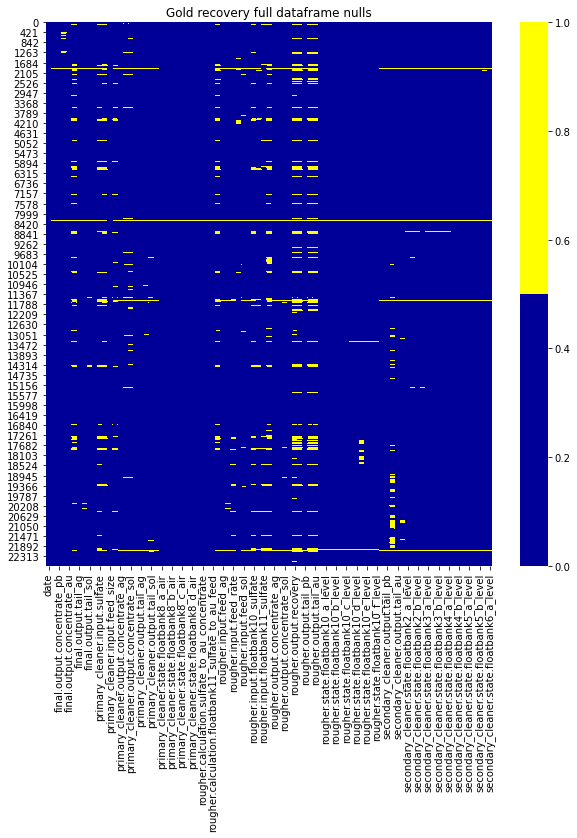

In [8]:
def visualize_df_nulls(df):
    """
    Функция отображает процент пропусков и их число, а также визуализирует их.
    
    """
    colours = ['#000099', '#ffff00']
    plt.figure(figsize=(10, 10))
    sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
    plt.title(df.name + ' nulls')

    print('{:^50}{:^18}{:^14}'.format('Столбец', 'Пропусков, %', 'Всего пропусков'))
    for col in df.columns:
        missed_data_share = df[col].isnull().mean() * 100
        missed_data_count = df[col].isnull().sum()
        print('{:<50}{:^18.3f}{:^14}'.format(col, missed_data_share, missed_data_count))

        
for df in df_list:
    print_bold(df.name)
    visualize_df_nulls(df)
    print()

В обучающем датасете процент пропусков по произнакам в целом меньше 10%, однако есть признаки, в которых пропущено больше 10% данных; то же можно сказать и про полный датасет. Следовательно, необходимо заполнить пропуски, а не удалять их ввиду ощутимой потери информации.

Посмотрим, как распределены данные по признакам, и проверим на выбросы и промахи.

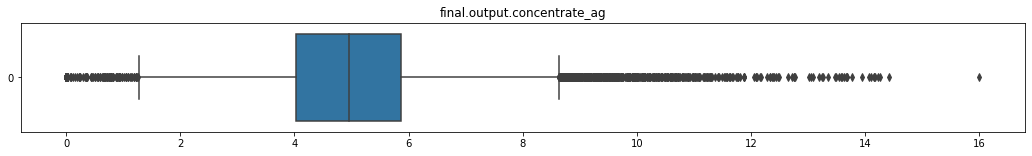

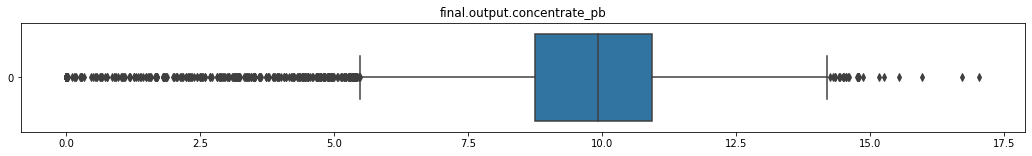

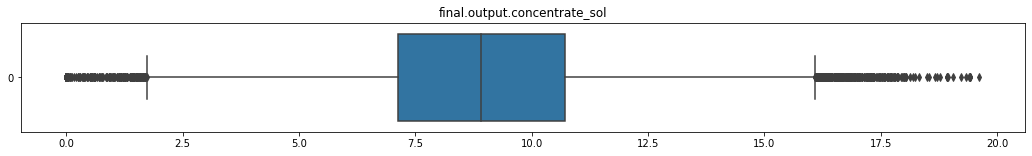

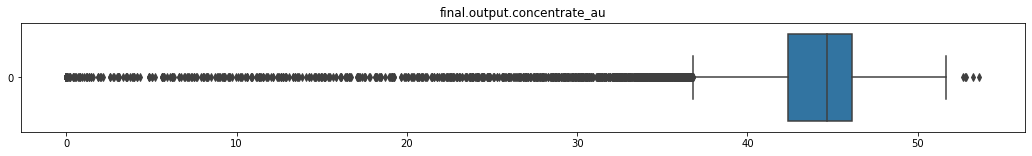

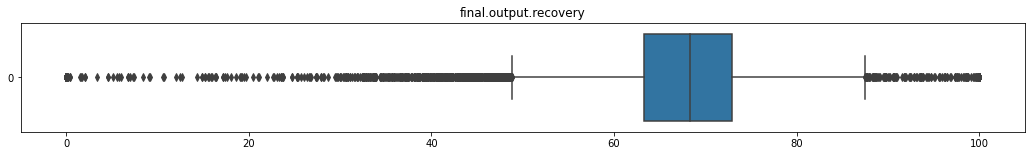

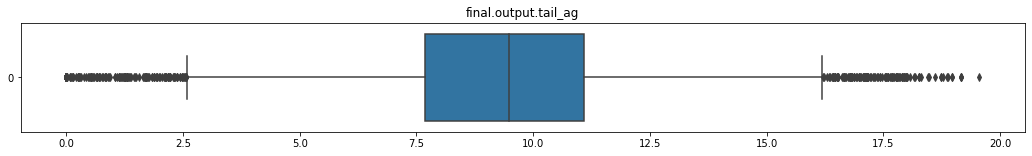

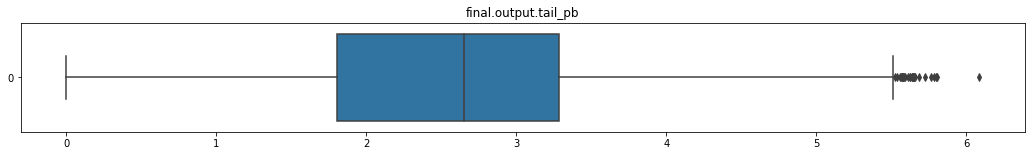

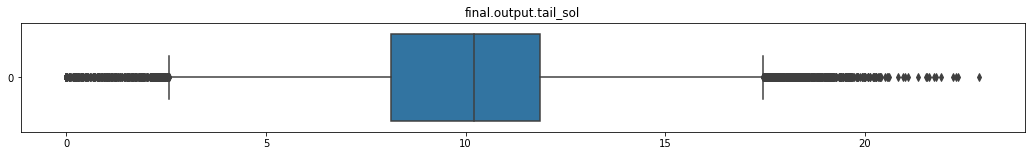

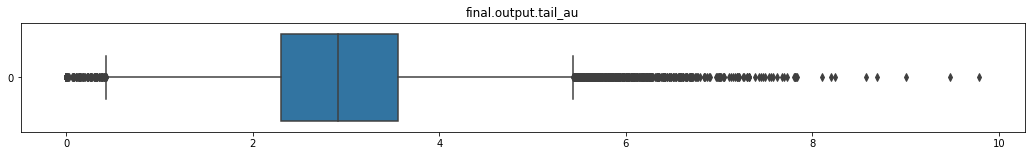

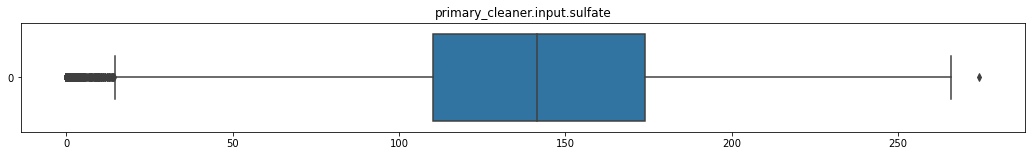

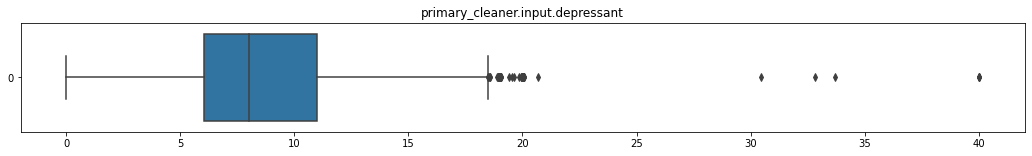

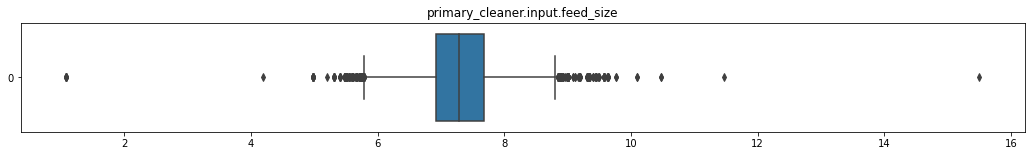

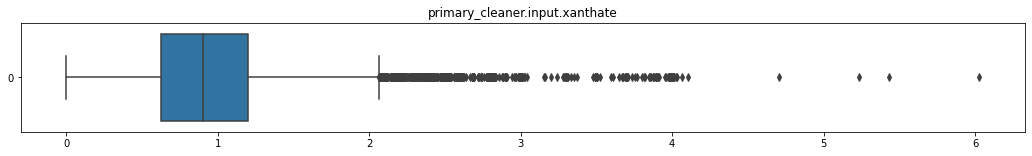

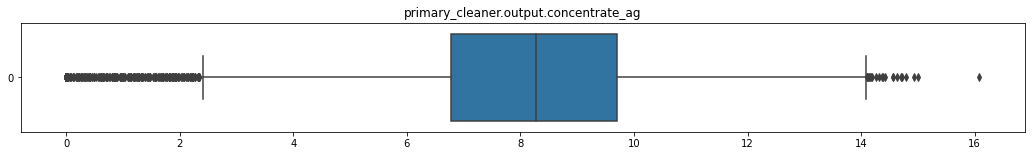

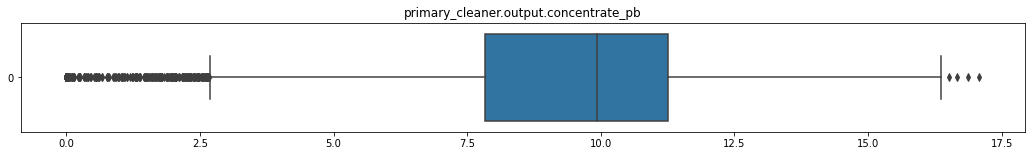

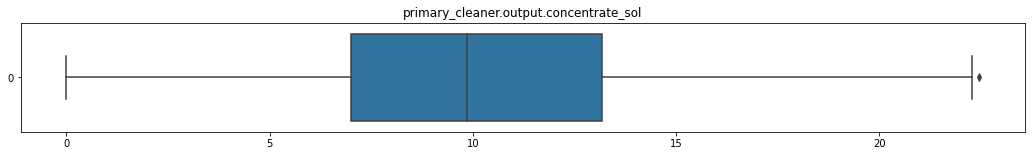

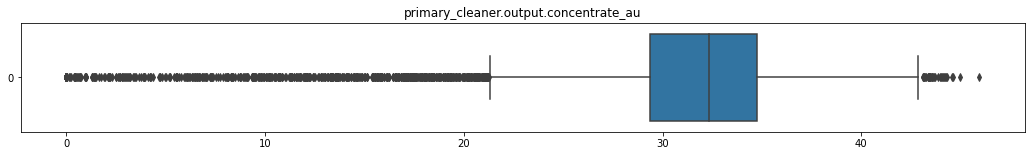

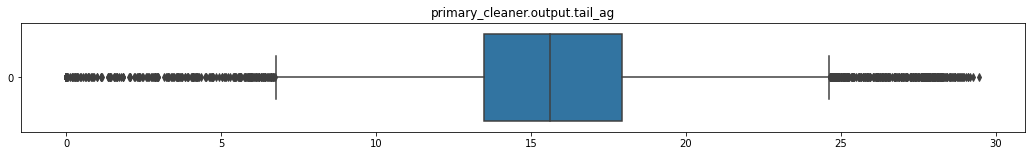

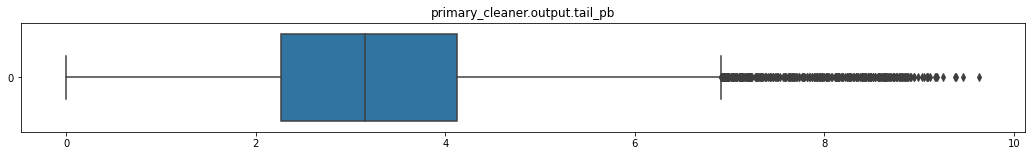

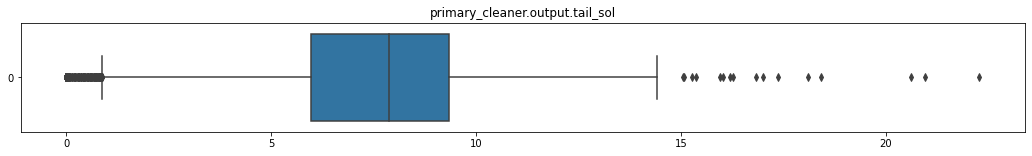

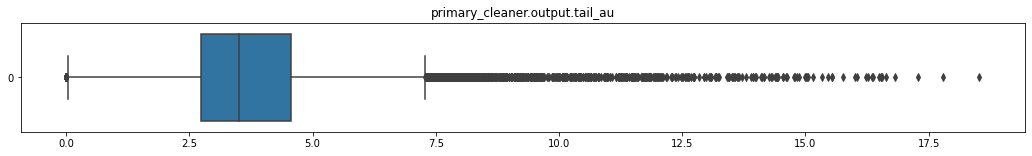

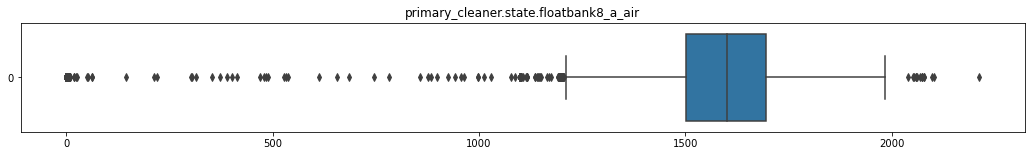

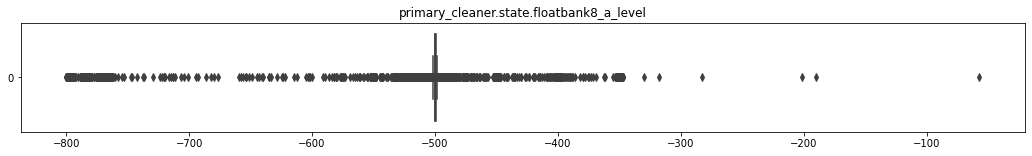

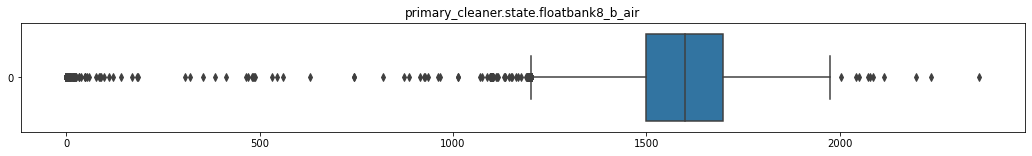

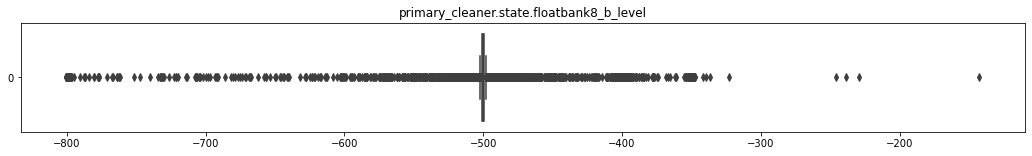

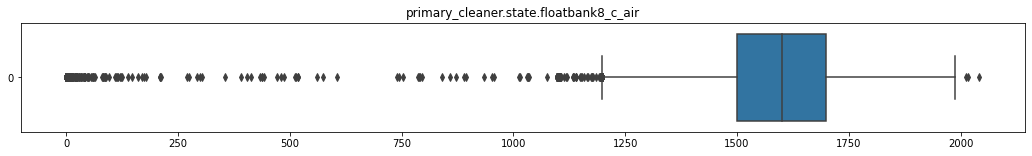

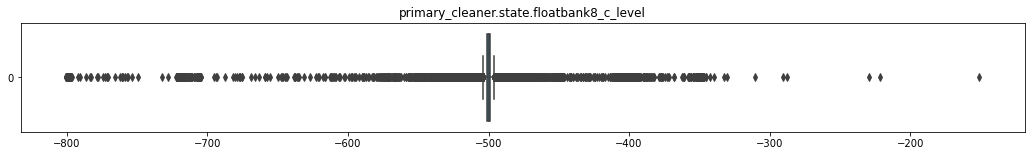

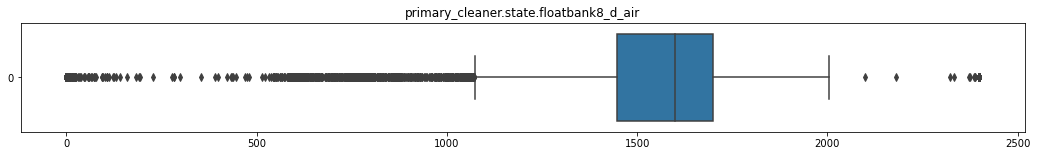

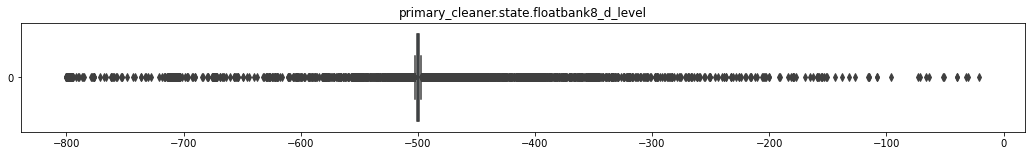

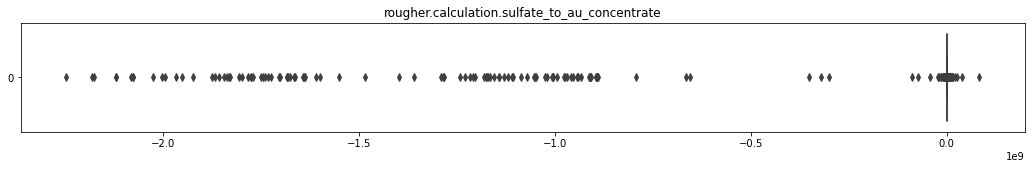

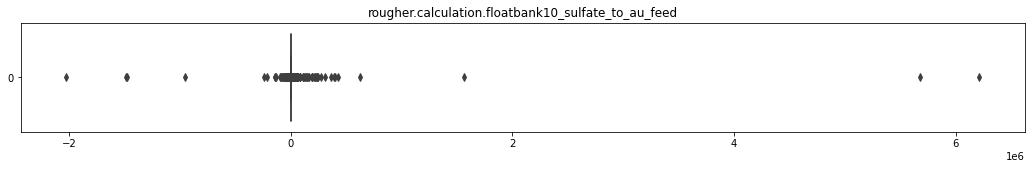

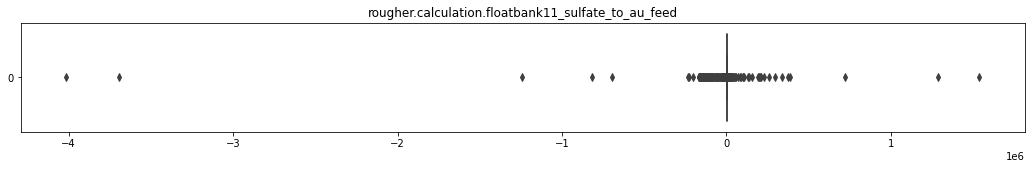

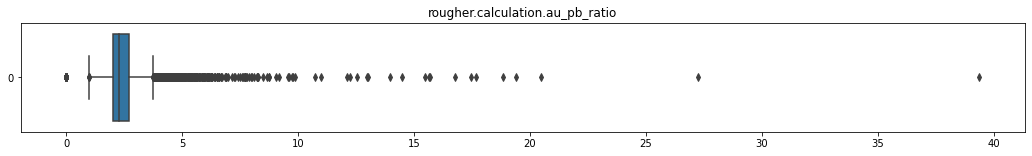

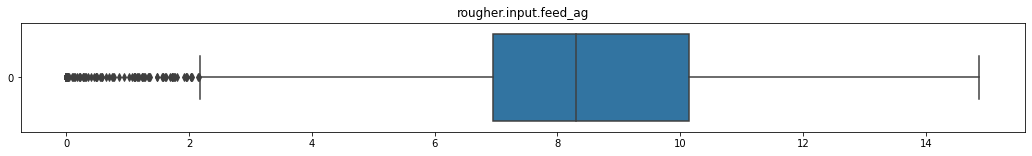

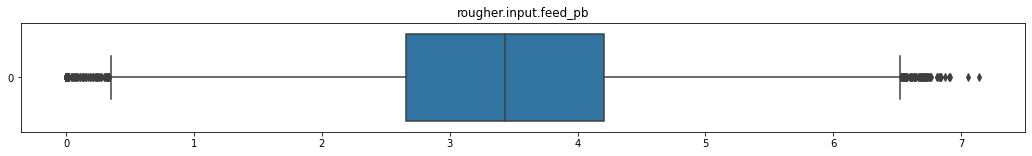

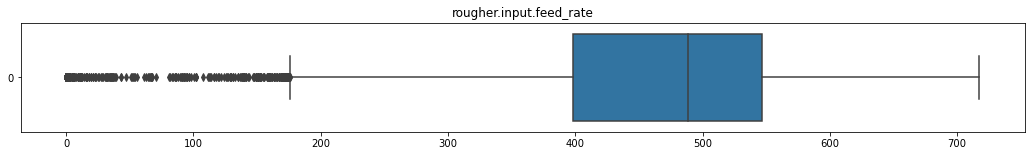

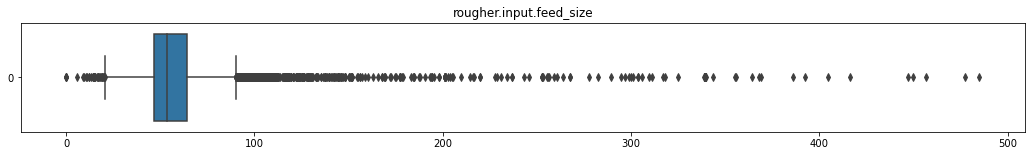

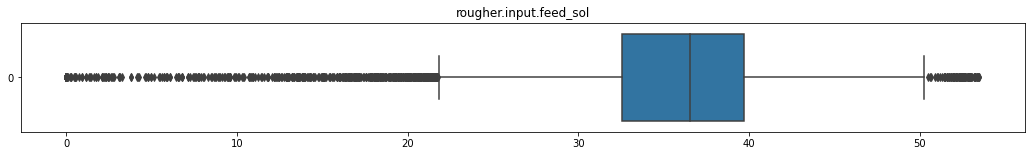

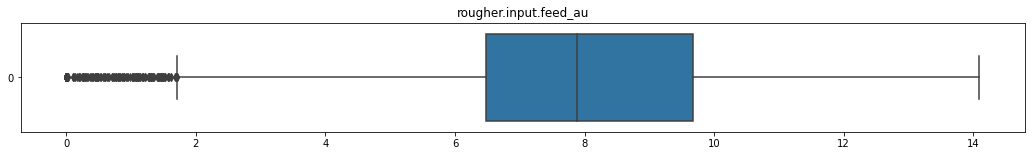

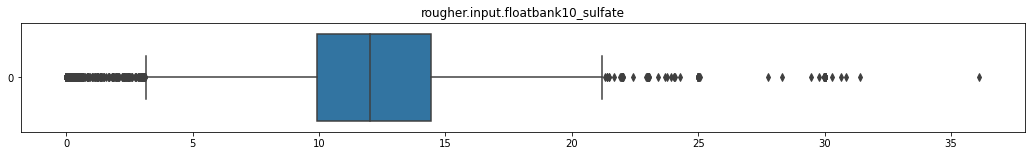

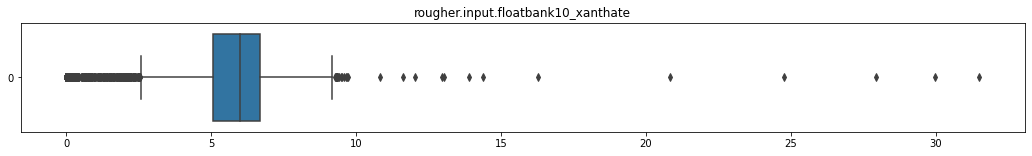

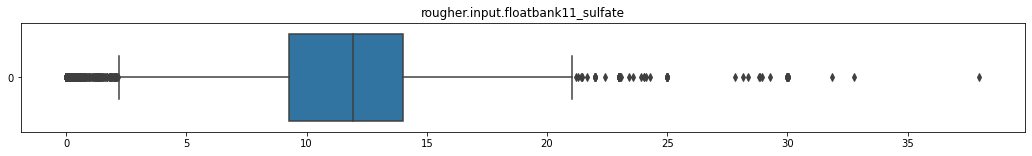

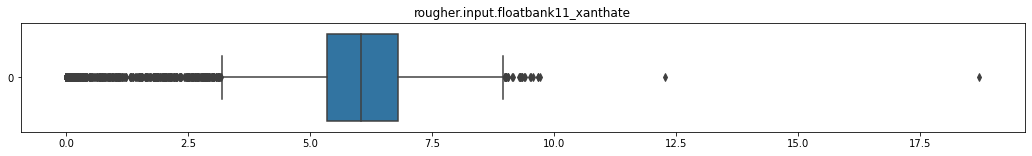

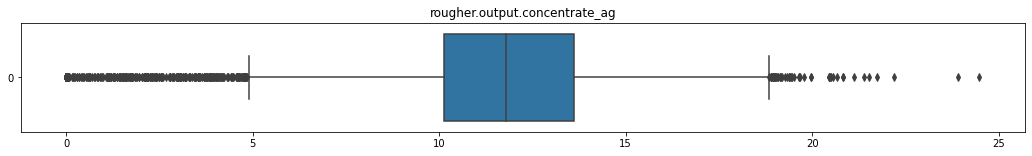

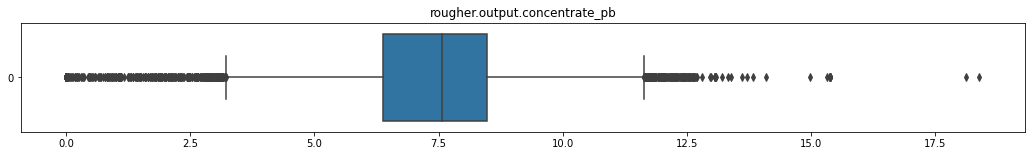

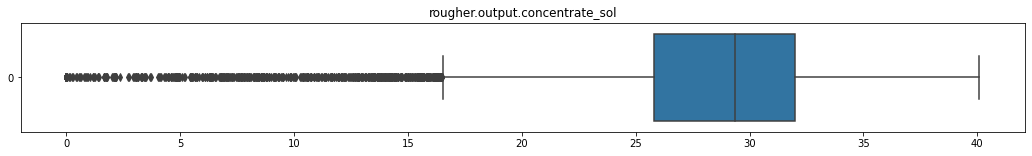

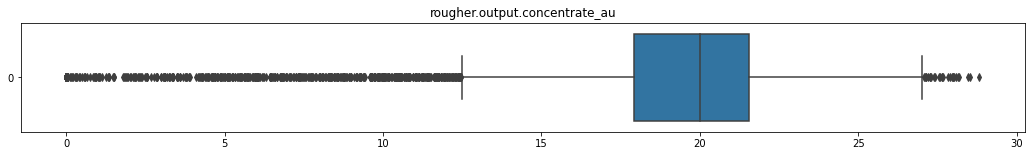

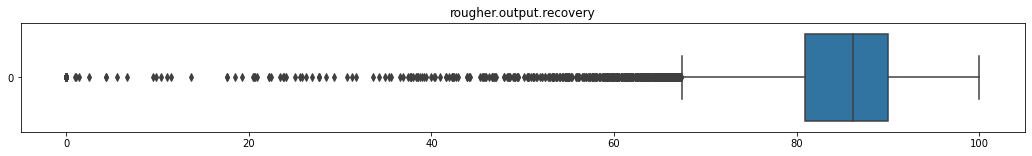

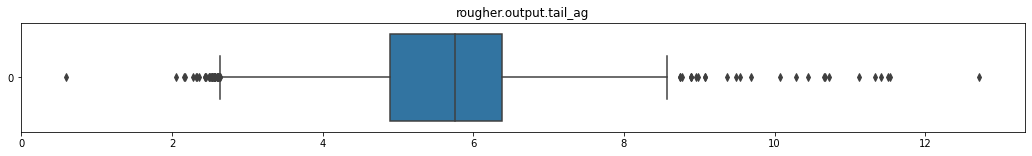

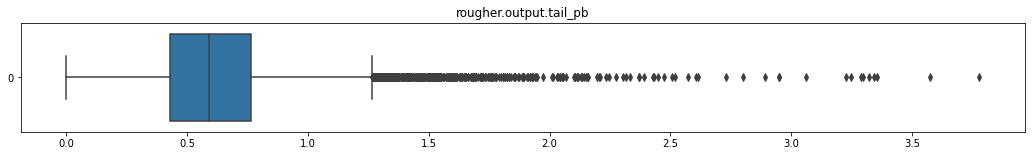

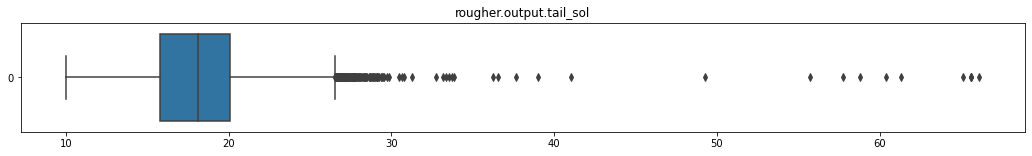

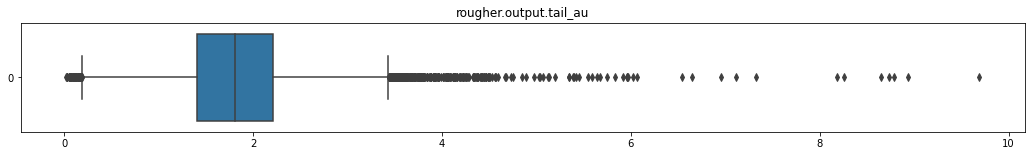

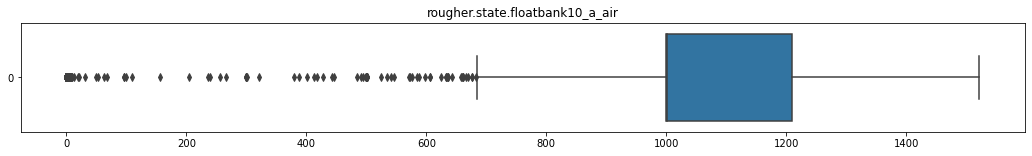

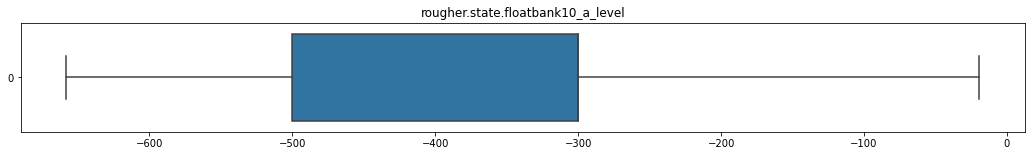

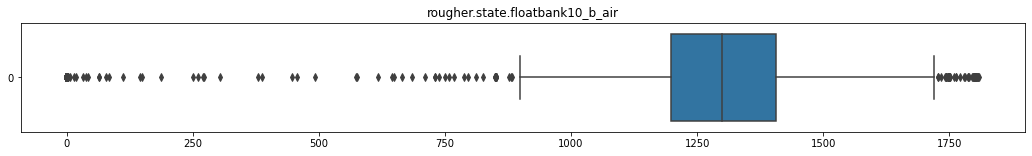

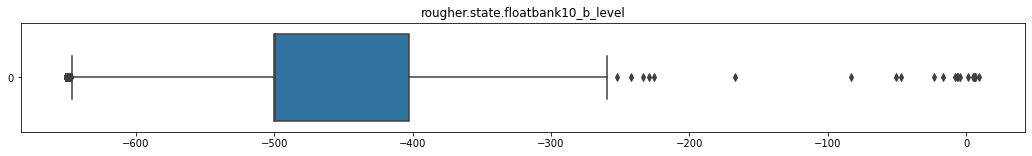

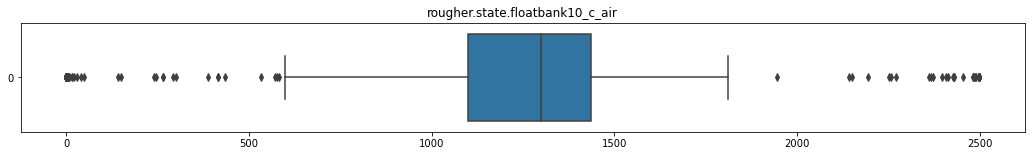

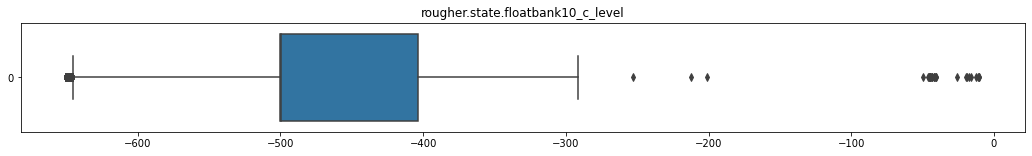

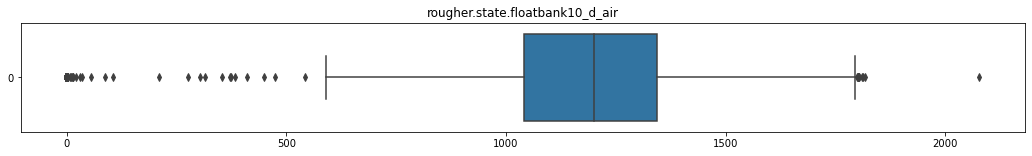

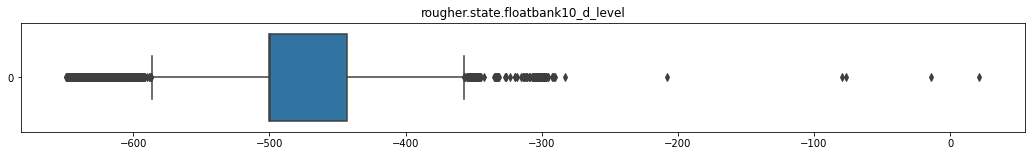

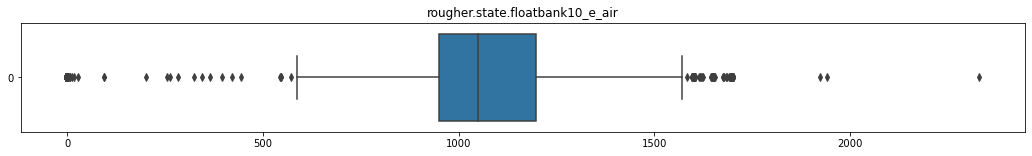

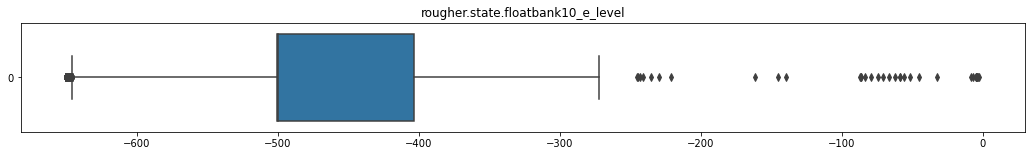

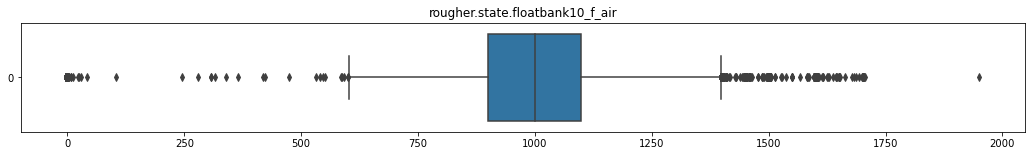

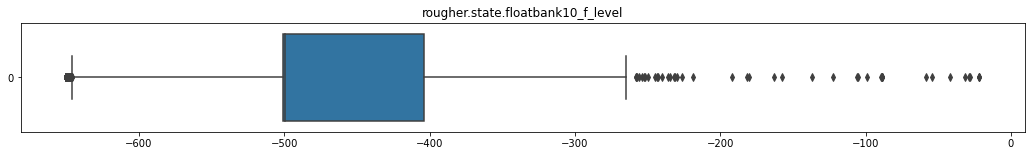

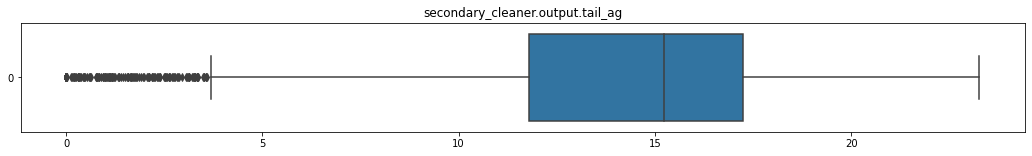

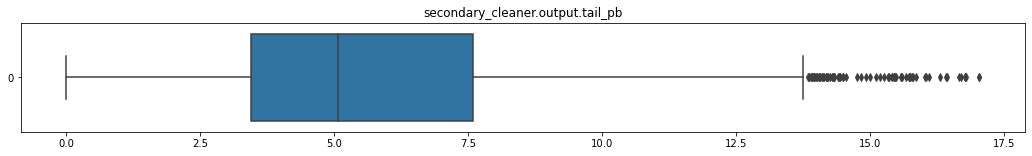

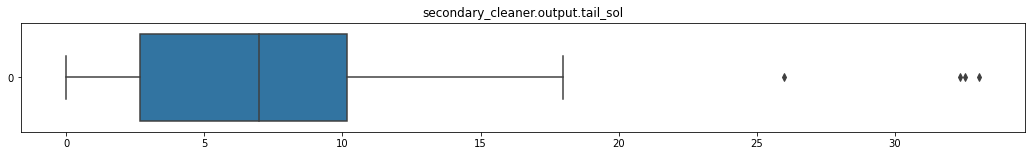

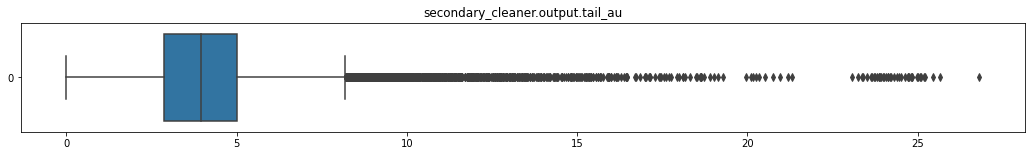

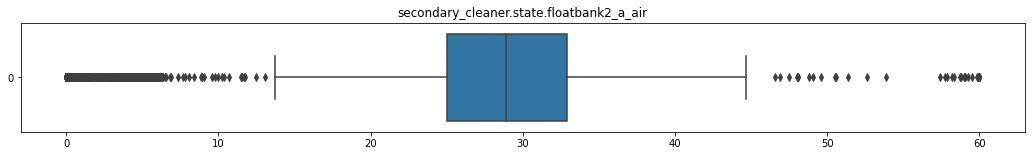

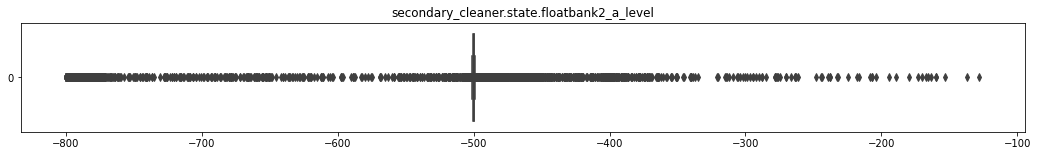

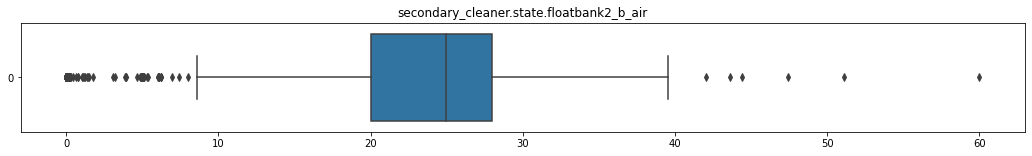

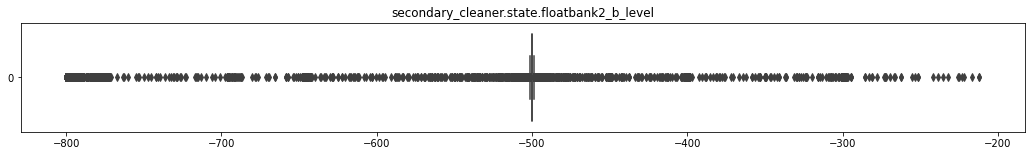

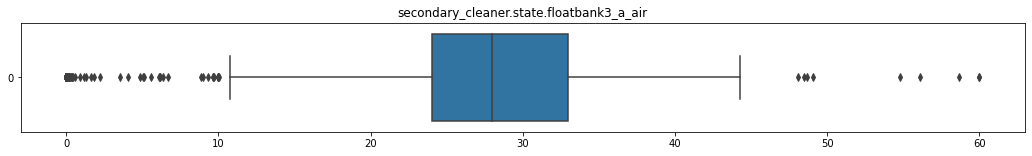

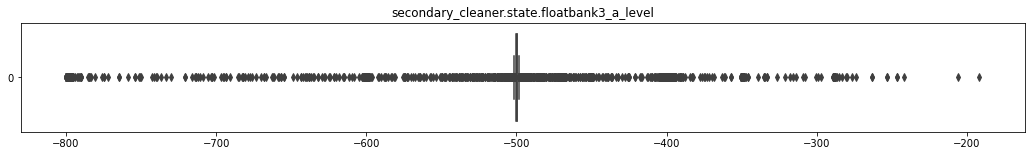

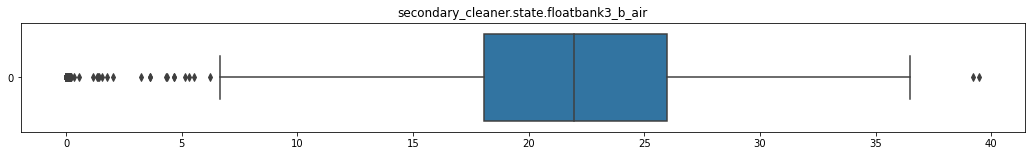

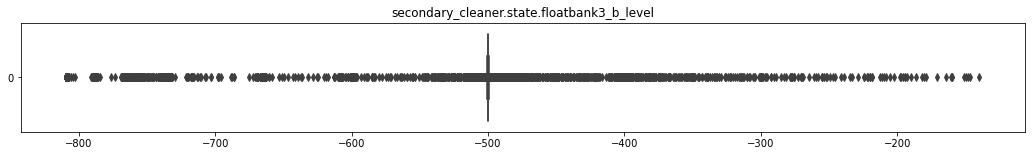

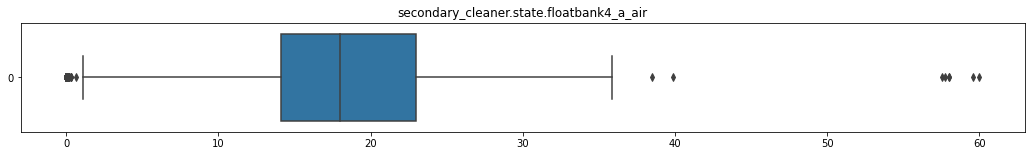

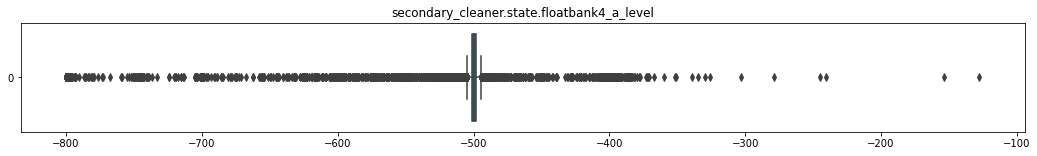

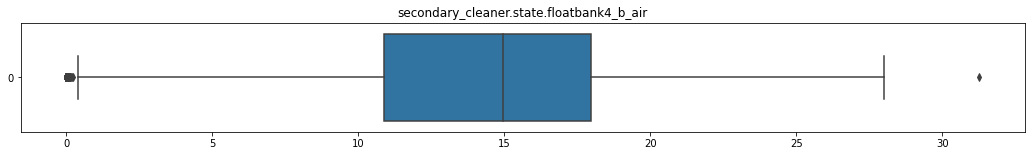

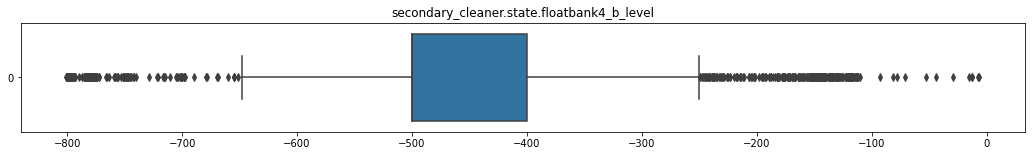

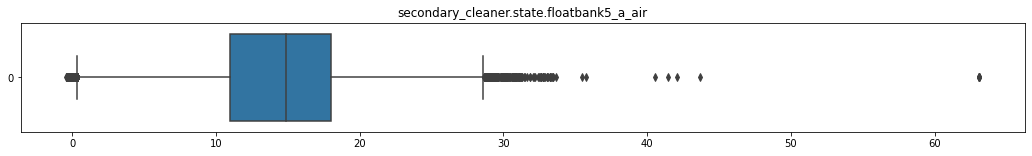

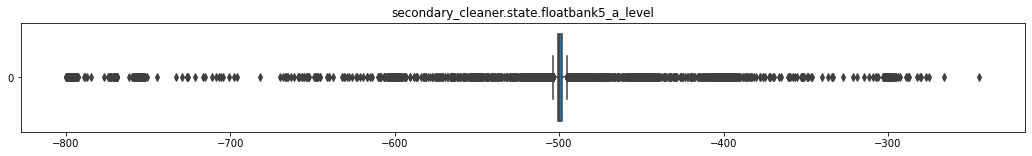

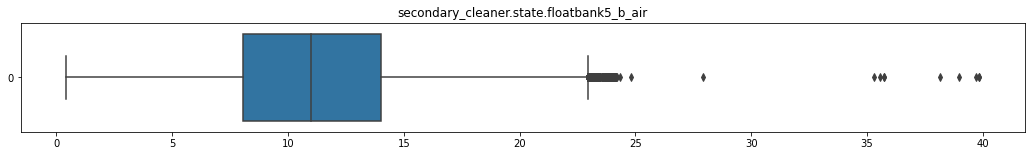

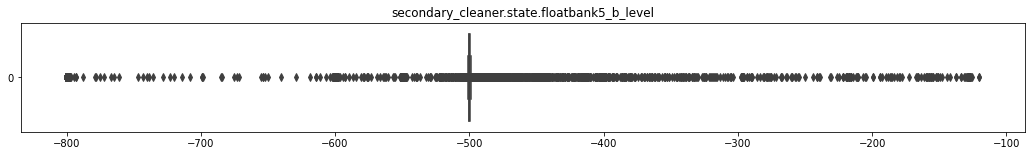

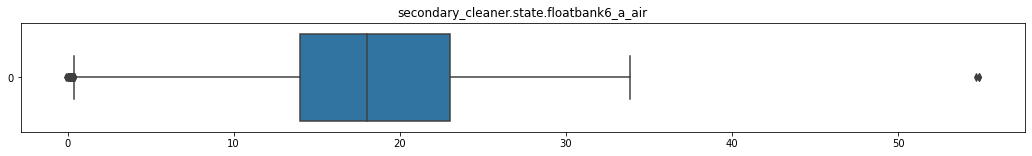

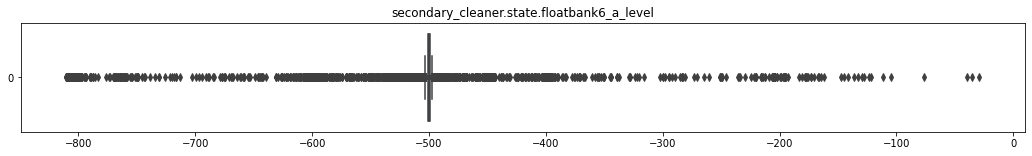

In [9]:
for col in train_df.columns[1:]:
    plt.figure(figsize=(18, 2))
    sns.boxplot(data=full_df[col], orient='h')
    plt.title(col)

Выбросы многочисленны и не похоже, чтобы являлись ошибками в измерениях или вычислениях, поэтому не будем их удалять.

## Проверка корректности расчёта эффективности обогащения

Напишем функцию для расчёта эффективности обогащения руды.

In [10]:
def calculate_recovery(row, stage):
    """
    Функция рассчитывает эффективность обогащения на выбранном этапе для строки датафрейма
    
    """
    filter_list = ['.output.concentrate_au', '.input.feed_au', '.output.tail_au']
    required_cols = [stage + filter_ for filter_ in filter_list]
    
    try:
        output_concentrate = row[required_cols[0]]
        input_concentrate = row[required_cols[1]]
        tail_concentrate = row[required_cols[2]]
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))
    
    try:
        recovery = output_concentrate * (input_concentrate - tail_concentrate) /\
                (input_concentrate * (output_concentrate - tail_concentrate)) * 100
    except ZeroDivisionError:
        recovery = np.nan
        
    return recovery

Посчитаем эффективность на этапе флотации и объединим с имеющимися расчётами из полного датасета. 

In [11]:
stage = 'rougher'
recovery_calculated = pd.Series(full_df.apply(lambda row: calculate_recovery(row, stage), axis=1),
                                name=stage + '.output.recovery_calculated')

recovery_df = pd.merge(full_df[stage + '.output.recovery'], recovery_calculated, how='left', left_index=True, right_index=True)
recovery_df.head()

,rougher.output.recovery,rougher.output.recovery_calculated
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


Удалим пропуски для корректного вычисления средней абсолютной ошибки и посчитаем метрику.

In [12]:
recovery_df.dropna(inplace=True)
cols = recovery_df.columns

mae = mean_absolute_error(recovery_df[cols[0]], recovery_df[cols[1]])
print('Средняя абсолютная ошибка расчёта эффективности флотации: {:.3e}'.format(mae))

Средняя абсолютная ошибка расчёта эффективности флотации: 9.850e-15


Значение метрики близко к нулю, значит, эффективность обогащения (на этапе флотации) посчитана корректно.

## Анализ признаков, недоступных в тестовой выборке

Выведем названия признаков, которые есть в полном и тренировочном датасете, но отсутствуют в тестовом.

In [13]:
test_cols = test_df.columns
full_cols = full_df.columns
inaccessable_cols = set(full_cols) - set(test_cols)
inaccessable_cols

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Заметно, что данные параметры являются либо выходными на разных стадиях, либо рассчитанными. Также в тестовом наборе нет целевых признаков. Возможная причина отсутствия описана ниже.

*Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.*

## Предобработка данных

Заполним пропуски в тренировочном и тестовом датасетах методом линейной интерполяции.

In [14]:
train_df.interpolate(inplace=True)
test_df.interpolate(inplace=True)
full_df.interpolate(inplace=True)

Проверим корректность заполнения.

In [15]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum(), full_df.isnull().sum().sum()

(0, 0, 0)

Пропуски успешно заполнены.

## Вывод

* Исходные наборы данных:
    1. Датасет для обучения. Состоит из 87 признаков и 16860 объектов.
    2. Тестовый датасет. Состоит из 53 признаков и 5856 объектов.
    3. Полный датасет. Состоит из 87 признаков и 22716 объектов.
* Анализ данных показал, что тренировочный датасет был сформирован из трёх частей полного датасета, а тестовый - из оставшихся двух.
* В полном, тренировочном и тестовом датасетах нет дубликатов.
* Пропуски есть во всех трёх датасетах. Заполнены с помощью линейной интерполяции.
* Результаты проверки показали, что расчёт эффективности обогащения произведён корректно.
* Анализ признаков, недоступных в тестовой выборке, показал, что данные признаки являются выходными или расчётными. Данные параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.

# Анализ данных

## Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

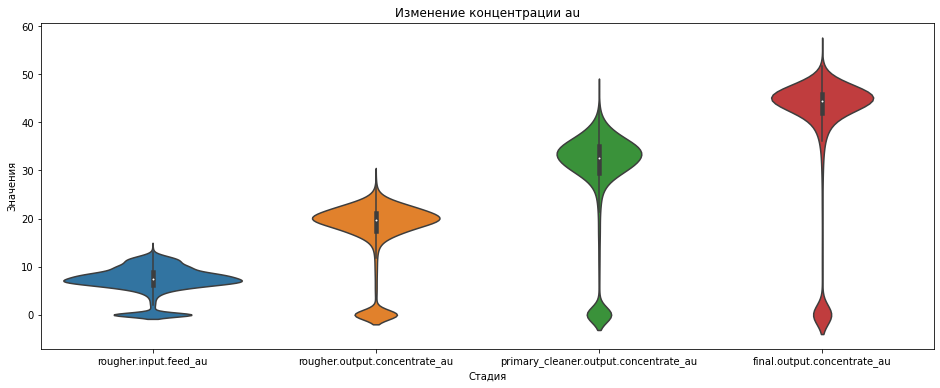

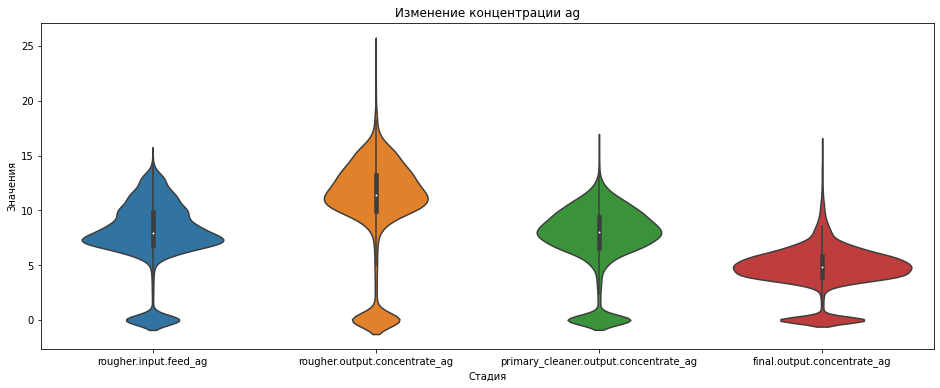

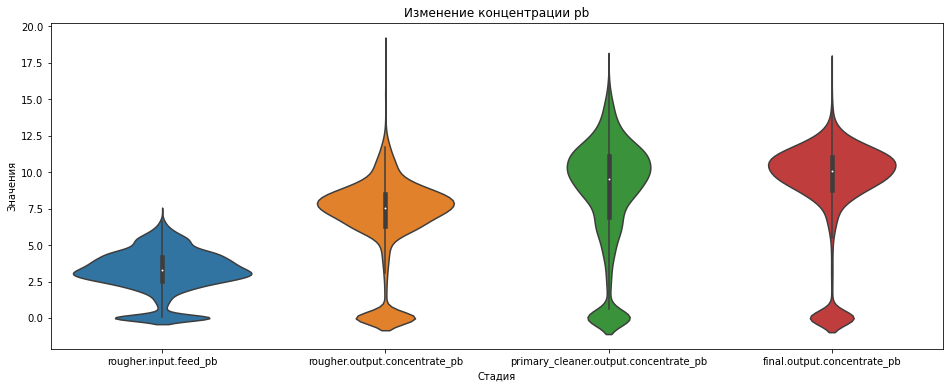

In [16]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_',
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']

for metal in metals:
    cols = [s + metal for s in stages]
    plt.figure(figsize=(16, 6))
    ax = sns.violinplot(
        x='variable',
        y='value',
        data=pd.melt(train_df[cols])
    )

    plt.title('Изменение концентрации ' + metal)
    plt.xlabel('Стадия');
    plt.ylabel('Значения');

Видно, что концентрация золота растёт почти линейно, концентрация свинца также растёт, но асимптотически. Концентрация же серебра увеличивается после флотации и затем уменьшается с каждой стадией очистки.  
Заметны области в районе нуля, в которых есть значения концентрации, что скорее всего соответствует пустой породе и не является нормой.

## Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

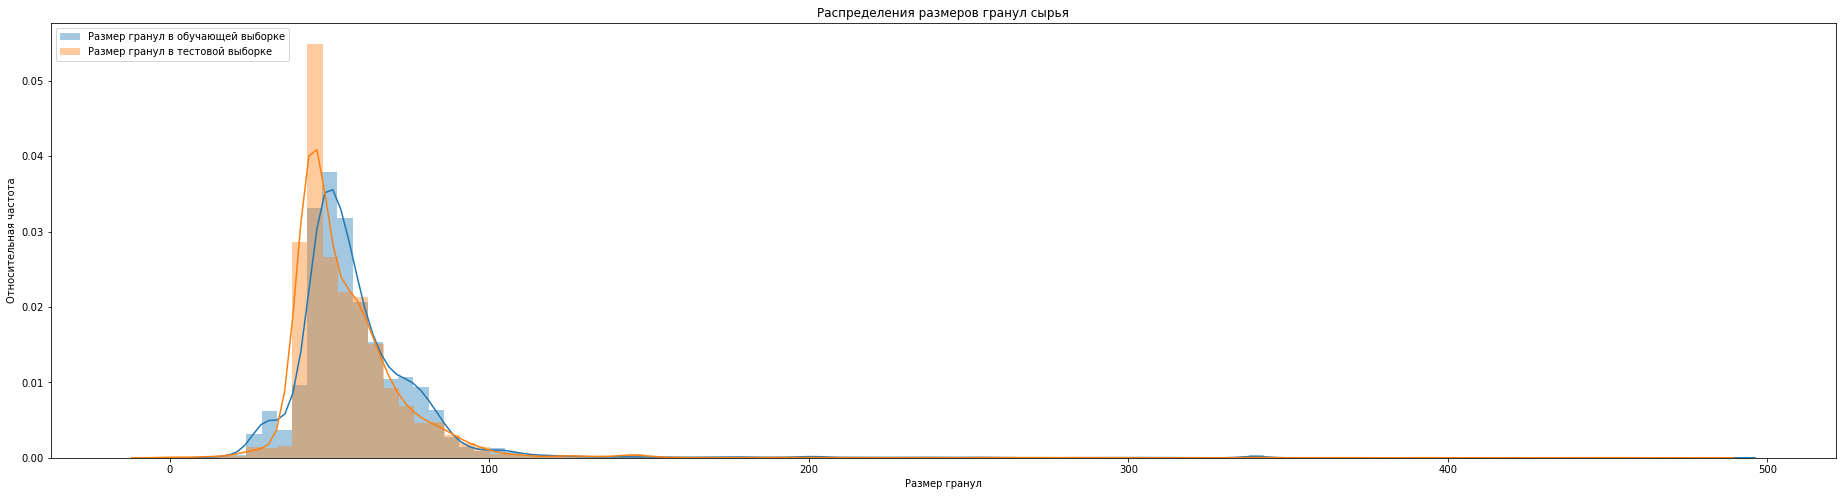

In [17]:
plt.figure(figsize=(32, 8))
sns.distplot(train_df['rougher.input.feed_size'], bins=100, label='Размер гранул в обучающей выборке')
sns.distplot(test_df['rougher.input.feed_size'], bins=100, label='Размер гранул в тестовой выборке')

plt.legend(loc='upper left')
plt.xlabel('Размер гранул');
plt.ylabel('Относительная частота');
plt.title('Распределения размеров гранул сырья');

Визуально распределения похожи, что не должно повлиять на оценку модели.

## Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

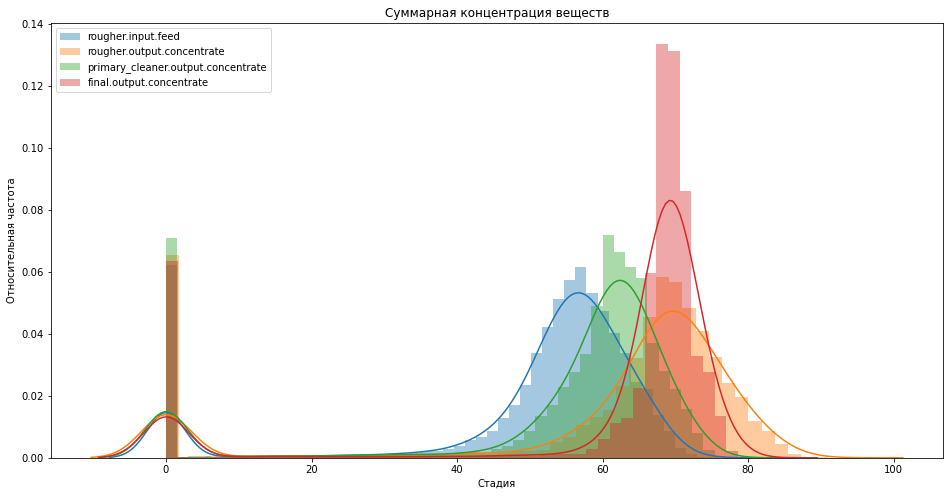

In [18]:
materials = metals + ['sol']

plt.figure(figsize=(16, 8))
for stage in stages:
    cols = [stage + material for material in materials]
    concentrate_sum = train_df[cols].apply(np.sum, axis=1)
    sns.distplot(concentrate_sum, label=stage[:-1])

    plt.legend(loc='upper left')
    plt.title('Суммарная концентрация веществ')
    plt.xlabel('Стадия');
    plt.ylabel('Относительная частота');

По графикам видно:
* после флотации средняя суммарная концентрация увеличивается, при этом дисперсия почти не изменяется;
* после первичной очистки среднее немного уменьшается, а дисперсия чуть возрастает;
* после вторичной очистки среднее увеличивается до послефлотационного уровня, дисперсия же возрастает примерно в 4 раза;
* как следствие пункта 3.1 наличие достаточно большого числа околонулевых значений суммарных концентраций.

Найдём эмпирически порог для отсеивания аномально низких значений суммарной концентрации всех веществ. Ограничим сверху значением 0.5 и построим те же распределения.

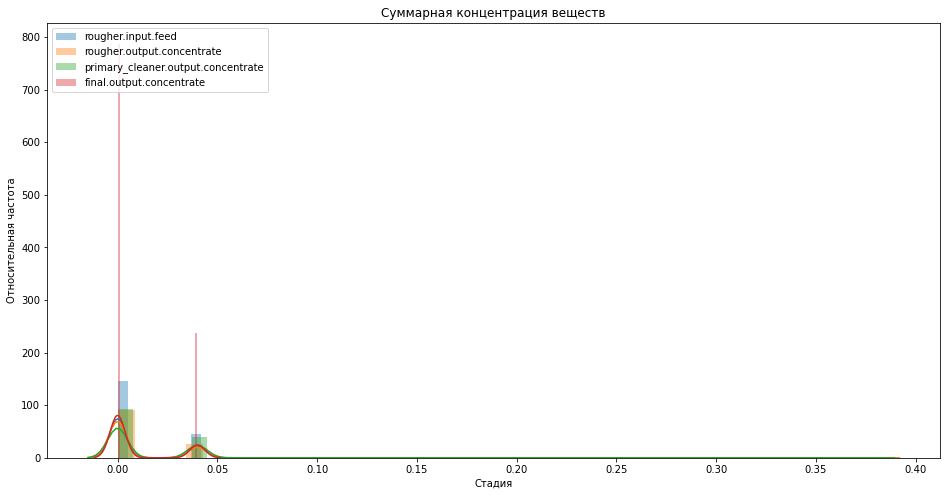

In [19]:
materials = metals + ['sol']

plt.figure(figsize=(16, 8))
for stage in stages:
    cols = [stage + material for material in materials]
    concentrate_sum = train_df[cols].apply(np.sum, axis=1)
    sns.distplot(concentrate_sum[concentrate_sum < 0.5], label=stage[:-1])

    plt.legend(loc='upper left')
    plt.title('Суммарная концентрация веществ')
    plt.xlabel('Стадия');
    plt.ylabel('Относительная частота');

Как видно, сверхмалые значения концентраций сгруппировались в интервале от 0 до 0.05. Возьмём с запасом порог 0.1 и посмотрим на новые распределения.

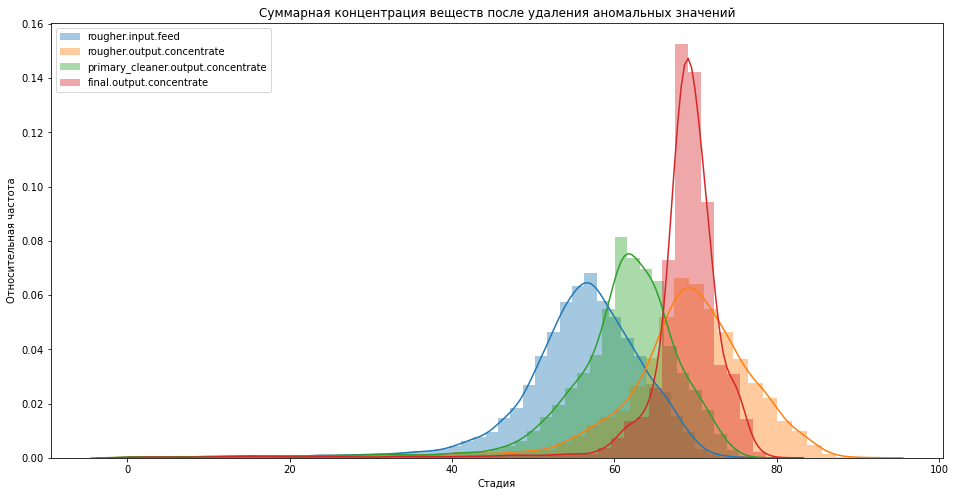

In [20]:
plt.figure(figsize=(16, 8))
for stage in stages:
    cols = [stage + material for material in materials]
    concentrate_sum = train_df[cols].apply(np.sum, axis=1)
    sns.distplot(concentrate_sum[concentrate_sum > 0.1], label=stage[:-1])

    plt.legend(loc='upper left')
    plt.title('Суммарная концентрация веществ после удаления аномальных значений')
    plt.xlabel('Стадия');
    plt.ylabel('Относительная частота');

Аномальные значения успешно отфильтрованы. Удалим их из тренировочной и тестовой выборок.

In [21]:
print('Размеры тренировочной выборки до удаления аномалий:', train_df.shape)
print('Размеры тестовой выборки до удаления аномалий:', test_df.shape)
print('Размеры полной выборки до удаления аномалий:', full_df.shape)
print()

for stage in stages:
    cols = [stage + material for material in materials]
    concentrate_sum_train = train_df[cols].apply(np.sum, axis=1)
    
    train_ids = concentrate_sum_train[concentrate_sum_train > 0.1].index
    train_df = train_df.loc[train_ids, :]
    
    concentrate_sum_full = full_df[cols].apply(np.sum, axis=1)
    full_ids = concentrate_sum_full[concentrate_sum_full > 0.1].index
    full_df = full_df.loc[full_ids, :]
    
    try:
        concentrate_sum_test = test_df[cols].apply(np.sum, axis=1)
        test_ids = concentrate_sum_test[concentrate_sum_test > 0.1].index
        test_df = test_df.loc[test_ids, :]
    except:
        pass
    
print('Размеры тренировочной выборки после удаления аномалий:', train_df.shape)
print('Размеры тестовой выборки после удаления аномалий:', test_df.shape)
print('Размеры полной выборки после удаления аномалий:', full_df.shape)

Размеры тренировочной выборки до удаления аномалий: (16860, 87)
Размеры тестовой выборки до удаления аномалий: (5856, 53)
Размеры полной выборки до удаления аномалий: (22716, 87)

Размеры тренировочной выборки после удаления аномалий: (14362, 87)
Размеры тестовой выборки после удаления аномалий: (5485, 53)
Размеры полной выборки после удаления аномалий: (19619, 87)


## Вывод

* Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки показал, что концентрация золота растёт почти линейно, концентрация свинца также растёт, но асимптотически. Концентрация же серебра увеличивается после флотации и затем уменьшается с каждой стадией очистки. Замечены области в районе нуля, в которых есть значения концентрации, что скорее всего соответствует пустой породе и не является нормой.
* Произведено визуальное сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Выяснилось, что распределения похожи, что не должно повлиять на оценку модели.
* Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах показал:
    * после флотации средняя суммарная концентрация увеличивается, при этом дисперсия почти не изменяется;
    * после первичной очистки среднее немного уменьшается, а дисперсия чуть возрастает;
    * после вторичной очистки среднее увеличивается до послефлотационного уровня, дисперсия же возрастает примерно в 4 раза;
    * наличие достаточно большого числа околонулевых значений суммарных концентраций.
* По результатам анализа аномальные значения были успешно отфильтрованы и удалены из полной, тренировочной и тестовой выборок.

# Модель

## Функция для вычисления метрики качества

Напишем функцию для вычисления симметричной средней абсолютной процентной ошибки по истинным и прогнозным значениям, а также функцию для расчёта итоговой метрики по следующей формуле:

$sMAPE\_final = 25\% * sMAPE(rougher) + 75\% * sMAPE(final)$

* $rougher$ - концентрация вещества после флотации (истинная и прогнозная);
* $final$ - концентрация вещества после очистки (истинная и прогнозная).

In [22]:
def SMAPE(y_true, y_pred):
    """
    Функция рассчитывает симметричную среднюю абсолютную процентную ошибку.
    
    """
    Y_true = np.array(y_true)
    Y_pred = np.array(y_pred)
    
    if Y_true.shape != Y_pred.shape:
        print("Error: y_true and y_pred shape doesn't match! Got {} and {}.".format(str(Y_true.shape), str(Y_pred.shape)))
        return None
    
    try:
        smape = sum(2 * abs(Y_true - Y_pred) / (abs(Y_true) + abs(Y_pred))) * 100 / len(Y_true)
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))
        return None
        
    return smape


def final_SMAPE(y_true, y_pred):
    """
    Функция рассчитывает итоговую ошибку по формуле final_SMAPE = 25% * sMAPE(rougher) + 75% * sMAPE(final), где
    rougher - концентрация вещества после флотации (истинная и прогнозная);
    final - концентрация вещества после очистки (истинная и прогнозная).
    
    """    
    Y_true = np.array(y_true)
    Y_pred = np.array(y_pred)
    
    if Y_true.shape != Y_pred.shape:
        print("Error: y_true and y_pred shape doesn't match! Got {} and {}.".format(str(Y_true.shape), str(Y_pred.shape)))
        return None
    
    try:
        smape = SMAPE(Y_true, Y_pred)
        final_smape = 0.25 * smape[0] + 0.75 * smape[1]
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))
        return None
    
    return final_smape

Создадим на основе этих функций "оценщиков" для использования в перекрёстной проверке.

In [23]:
symmetric_mean_absolute_percentage_error = make_scorer(SMAPE, greater_is_better=False)
final_symmetric_mean_absolute_percentage_error = make_scorer(final_SMAPE, greater_is_better=False)

## Отбор признаков

Отбросим недоступные признаки (в числе которых есть и два целевых) и дату из обучающей выборки. В целевую тренировочную выборку передадим эффективность обогащения руды на стадии флотации и на этапе очистки.

In [24]:
features_train = train_df.drop(columns=['date', *inaccessable_cols])

target_cols = ['rougher.output.recovery', 'final.output.recovery']
target_train = train_df[target_cols]

features_train.shape, target_train.shape

((14362, 52), (14362, 2))

Из тестовой выборки удалим даты. В целевую тестовую выборку передадим значения эффективности для дат из тестовой выборки.

In [25]:
features_test = full_df[full_df['date'].isin(test_df['date'])][test_df.columns].drop(columns=['date'])
target_test = full_df[full_df['date'].isin(test_df['date'])][target_cols]

features_test.shape, target_test.shape

((5257, 52), (5257, 2))

Проведём корреляционный анализ для отбора подходящих признаков. Построим корреляционную матрицу обучающего множества.

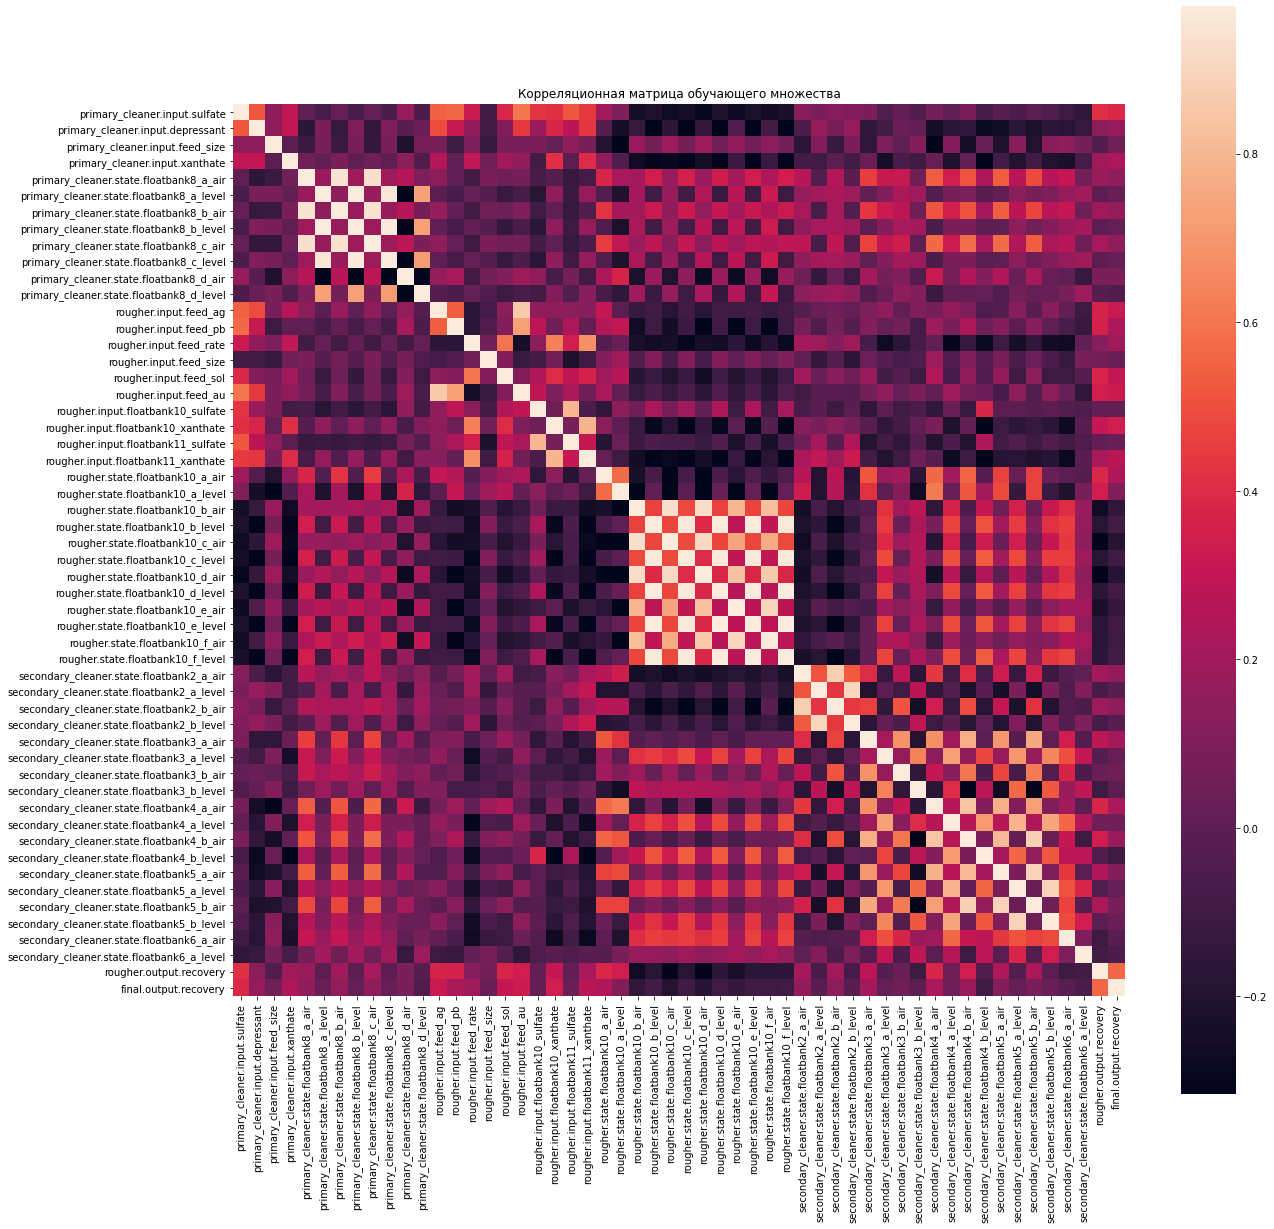

In [26]:
corr_matrix = (pd.concat([features_train, target_train], axis=1)).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, robust=True, square=True)
plt.title('Корреляционная матрица обучающего множества')
plt.show()

Видны светлые области, значит, есть подозрение на наличие мультиколлинеарности в датасете. Целевые же признаки в основном окрашены в тёмные цвета, что соответствует слабой и очень слабой корреляции.

Найдём коррелирующие между собой признаки, порог очень сильной корреляции примем 0.9. Среди нескольких взаимозависимых признаков выберем один, который лучше коррелирует с обоими целевыми признаками.

In [27]:
high_correlated_features = []
train_corr = features_train.corr()

for col in features_train.columns[:-1]:
    train_corr.drop(index=col, inplace=True)
    corr_features = train_corr[train_corr[col] > 0.9].index.tolist() + [col]
    corr_features_with_target = (
        corr_matrix
        .loc[corr_features, target_train.columns]
        .abs()
        .apply(np.sum, axis=1)
        .sort_values(ascending=False)[1:]
    )
    
    high_correlated_features.extend(corr_features_with_target.index.tolist())
    
set(high_correlated_features)

{'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level'}

Найдём признаки, слабо коррелирующие с целевым, порог очень слабой корреляции примем 0.2.

In [28]:
low_correlated_with_target = []

for col in corr_matrix.columns[:-2]:
    loc_corr_df = corr_matrix.loc[target_train.columns, :]
    if len(loc_corr_df[abs(loc_corr_df[col]) < 0.2][col]) == 2:
        low_correlated_with_target.extend([col])
    
set(low_correlated_with_target)

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.flo

Объединим найденные признаки.

In [29]:
features_to_drop = set([*high_correlated_features, *low_correlated_with_target])
features_to_drop

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_level',
 '

Удалим их из тренировочной и тестовой выборок.

In [30]:
features_train_reduced_by_correlation_test = features_train.drop(columns=features_to_drop)
features_test_reduced_by_correlation_test = features_test.drop(columns=features_to_drop)

print(features_train_reduced_by_correlation_test.shape, features_test_reduced_by_correlation_test.shape)
set(features_train_reduced_by_correlation_test.columns)

(14362, 19) (5257, 19)


{'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_c_air',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_e_air',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_b_air'}

Теперь попробуем выбрать признаки с помощью модели и оценки важности признаков. Возьмём линейную регрессию и методом рекурсивного удаления признаков найдём лучшие из них. В силу ограничения на число целевых признаков: библиотечный метод RFECV позволяет передавать только один целевой признак - будем импровизировать. Посчитаем sMAPE для каждого признака в отдельности.

In [31]:
lin_reg = LinearRegression(n_jobs=-1)
kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

rfecv_list = [
    RFECV(
        estimator=lin_reg,
        min_features_to_select=1,
        scoring=symmetric_mean_absolute_percentage_error,
        n_jobs=-1
    ).fit(features_train, target_train[col])
    for col in target_cols
]

Построим графики изменения качества модели в зависимости от количества признаков.

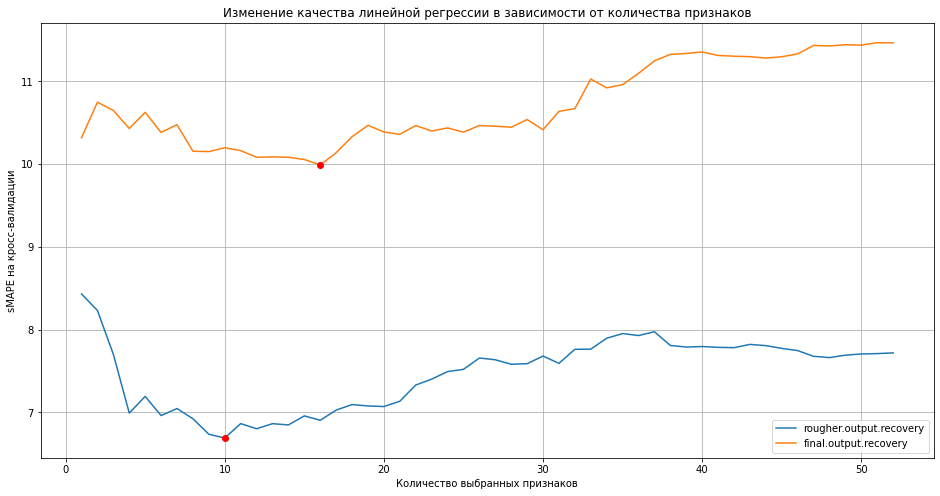

In [32]:
plt.figure(figsize=(16,8))

for col, rfe in zip(target_cols, rfecv_list):
    scores = -rfe.grid_scores_
    best_n_features = rfe.n_features_
    
    plt.plot(range(1, len(scores) + 1), scores, label=col)
    plt.plot(best_n_features, min(scores), 'ro')

plt.legend(loc='lower right')
plt.title('Изменение качества линейной регрессии в зависимости от количества признаков')
plt.xlabel('Количество выбранных признаков')
plt.ylabel('sMAPE на кросс-валидации')
plt.grid(True)
plt.show()

Как видим, минимумы метрики находятся рядом, но не совпадают, а значит, часть признаков, которая была отобрана как лучшая на одном целевом признаке, не попала в топ на другом целевом признаке.

Построим график для итогового sMAPE.

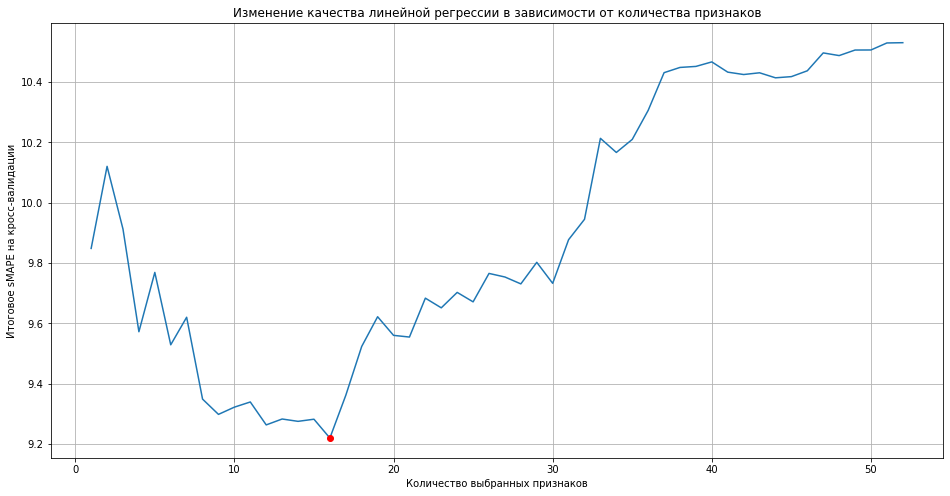

Лучшее количество признаков: 16
Лучшее итоговое sMAPE: 9.219


In [33]:
plt.figure(figsize=(16,8))

scores = 0.25 * -rfecv_list[0].grid_scores_ + 0.75 * -rfecv_list[1].grid_scores_
best_n_features = np.where(scores == min(scores))[0][0] + 1
plt.plot(range(1, len(scores) + 1), scores)
plt.plot(best_n_features, min(scores), 'ro')

plt.title('Изменение качества линейной регрессии в зависимости от количества признаков')
plt.xlabel('Количество выбранных признаков')
plt.ylabel('Итоговое sMAPE на кросс-валидации')
plt.grid(True)
plt.show()

print('Лучшее количество признаков:', best_n_features)
print('Лучшее итоговое sMAPE: {:.3f}'.format(min(scores)))

Здесь минимум по качеству соответствует 15 признакам в обучающей выборке, что необязательно получится при пересечении лучших признаков.

Найдём признаки, которые были выбраны как лучшие на обоих целевых признаках.

In [34]:
mask = rfecv_list[0].support_ & rfecv_list[1].support_
selected_features = features_train.columns[mask]
set(selected_features)

{'primary_cleaner.input.feed_size',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank4_b_air'}

13 признаков - удача! Таким образом качество не должно значительно отличаться от минимального на графике выше.

Извлечём выбранные признаки и инициализируем новые тренировочную и тестовую выборки.

In [35]:
features_train_reduced_by_rfe_lin = features_train[selected_features]
features_test_reduced_by_rfe_lin = features_test[selected_features]

print(features_train_reduced_by_rfe_lin.shape, features_test_reduced_by_rfe_lin.shape)

(14362, 9) (5257, 9)


## Построение бейслайнов

Соберём вместе обучающие и тестовые признаки. Возьмём для обучения модели линейной регрессии, эластичной сетки и случайного леса. Проведём перекрёстную проверку для надёжности результатов, в качестве метрики передадим в метод скорер финального sMAPE.
Выведем результаты кросс-валидации.

In [36]:
features_train_test_dict = {
    'полных выборках': [features_train, features_test],
    'уменьшенных выборках после корреляционного анализа': [features_train_reduced_by_correlation_test,
                                                             features_test_reduced_by_correlation_test],
    'уменьшенных выборках после рекурсивного удаления признаков': [features_train_reduced_by_rfe_lin,
                                                                     features_test_reduced_by_rfe_lin]
}

models_dict = {
    'Линейная регрессия': LinearRegression(n_jobs=-1),
    'Линейная регрессия с нормализацией': LinearRegression(normalize=True, n_jobs=-1),
    'Эластичная сетка': ElasticNet(random_state=RANDOM_STATE),
    'Случайный лес': RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for model_desc, model in models_dict.items():
    print_bold(model_desc)
    for desc, feat in features_train_test_dict.items():
        cv_scores = cross_val_score(
            estimator=model,
            X=feat[0],
            y=target_train,
            scoring=final_symmetric_mean_absolute_percentage_error,
            cv=kfold,
            n_jobs=-1
        )
        
        metric = -cv_scores.mean()
        print('sMAPE на', desc, '= {:.3f}'.format(metric))
    print()

Линейная регрессия
sMAPE на полных выборках = 7.671
sMAPE на уменьшенных выборках после корреляционного анализа = 8.008
sMAPE на уменьшенных выборках после рекурсивного удаления признаков = 8.115

Линейная регрессия с нормализацией
sMAPE на полных выборках = 7.671
sMAPE на уменьшенных выборках после корреляционного анализа = 8.008
sMAPE на уменьшенных выборках после рекурсивного удаления признаков = 8.115

Эластичная сетка
sMAPE на полных выборках = 7.788
sMAPE на уменьшенных выборках после корреляционного анализа = 8.115
sMAPE на уменьшенных выборках после рекурсивного удаления признаков = 8.208

Случайный лес
sMAPE на полных выборках = 5.188
sMAPE на уменьшенных выборках после корреляционного анализа = 5.161
sMAPE на уменьшенных выборках после рекурсивного удаления признаков = 5.398



Все модели показали результат sMAPE меньше 9%, лучше всех обучилась модель случайного леса, что не случайно, так как с настройками по умолчанию случайный лес склонен переобучаться, что может привести к плохим результатам на тесте.

## Оптимизация гиперпараметров

Настроим "случайный лес" с помощью подбора гиперпараметров. Создадим функцию с подбором числа деревьев и максимальной глубины.

In [37]:
# Создадим функцию для отображения доверительного интервала в виде закрашенной области
def fill_confidence_interval(x, y, y_std, half_interval=3):
    ci_up_lim = y + half_interval*y_std
    ci_low_lim = y - half_interval*y_std
    plt.fill_between(x, ci_up_lim, ci_low_lim, alpha=0.4)


def random_forest_tuning_hyperparameters(x_train, y_train):
    # Инициализируем регрессор "случайный лес"
    rfr = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

    # Зададим набор значений числа базовых моделей n_estimators
    rng = range(10, 110, 30)
    params = {'n_estimators': rng}

    # Инициализируем и проведём кросс-валидацию
    rfr_grid = GridSearchCV(
        estimator=rfr,
        param_grid=params,
        cv=kfold,
        scoring=final_symmetric_mean_absolute_percentage_error,
        n_jobs=-1,
        return_train_score=True
    )
    rfr_grid.fit(x_train, y_train)

    # Выведем результаты обучения и тестирования
    train_score = -rfr_grid.cv_results_['mean_train_score']
    train_std = rfr_grid.cv_results_['std_train_score']
    test_score = -rfr_grid.cv_results_['mean_test_score']
    test_std = rfr_grid.cv_results_['std_test_score']
    x = rng

    plt.figure(figsize=(10, 8))

    fill_confidence_interval(x, train_score, train_std)
    fill_confidence_interval(x, test_score, test_std)
    plt.plot(x, train_score, "b", label='Обучение')
    plt.plot(x, test_score, "r", label='Валидация')
    plt.scatter(rfr_grid.best_params_['n_estimators'], test_score.min(), c='red', s=40)
    plt.legend(loc='center left')
    plt.xticks(ticks=x)
    plt.xlabel('Число деревьев')
    plt.ylabel('Итоговое sMAPE')
    plt.title('Итоговое sMAPE на обучающей и валидационной выборке')
    plt.grid(True)

    n_estimators_ = rfr_grid.best_params_['n_estimators']

    # Повторим эксперимент, зафиксируем число базовых моделей n_estimators
    # и зададим значения глубины дерева max_depth
    rfr = RandomForestRegressor(n_estimators=n_estimators_, random_state=17, n_jobs=-1)
    rng = range(5, 25, 4)
    params = {'max_depth': rng}
    rfr_grid = GridSearchCV(
        rfr,
        params,
        cv=kfold,
        scoring=final_symmetric_mean_absolute_percentage_error,
        n_jobs=-1,
        return_train_score=True
    )
    rfr_grid.fit(x_train, y_train)

    # Сохраним лучшую модель
    rfr_best = rfr_grid.best_estimator_

    # Выведем результаты обучения и валидации
    train_score = -rfr_grid.cv_results_['mean_train_score']
    train_std = rfr_grid.cv_results_['std_train_score']
    test_score = -rfr_grid.cv_results_['mean_test_score']
    test_std = rfr_grid.cv_results_['std_test_score']
    x = rng

    plt.figure(figsize=(10, 8))

    fill_confidence_interval(x, train_score, train_std)
    fill_confidence_interval(x, test_score, test_std)
    plt.plot(x, train_score, "b", label='Обучение')
    plt.plot(x, test_score, "r", label='Валидация')
    plt.scatter(rfr_grid.best_params_['max_depth'], test_score.min(), c='red', s=40)
    plt.legend(loc='center left')
    plt.xticks(ticks=x)
    plt.xlabel('Максимальная глубина деревьев')
    plt.ylabel('Итоговое sMAPE')
    ttl = 'Итоговое sMAPE на обучающей и валидационной выборке, число деревьев = '+ str(n_estimators_)
    plt.title(ttl)
    plt.grid(True)

    print('Лучшее итоговое sMAPE на обучающей выборке: {:.3f}'.format(train_score[test_score == test_score.min()][0]))
    print('Лучшее итоговое sMAPE на валидационной выборке: {:.3f}'.format(test_score.min()))
    print()
    print('Лучшие параметры модели "случайный лес":')
    print('Число деревьев =', n_estimators_)
    print('Максимальная глубина деревьев =', rfr_grid.best_params_['max_depth'])
    plt.show()
    
    return rfr_best

Проведём кросс-валидацию и выведем результаты подбора гиперпараметров.

Кросс-валидация на полных выборках
Лучшее итоговое sMAPE на обучающей выборке: 2.369
Лучшее итоговое sMAPE на валидационной выборке: 5.230

Лучшие параметры модели "случайный лес":
Число деревьев = 100
Максимальная глубина деревьев = 21


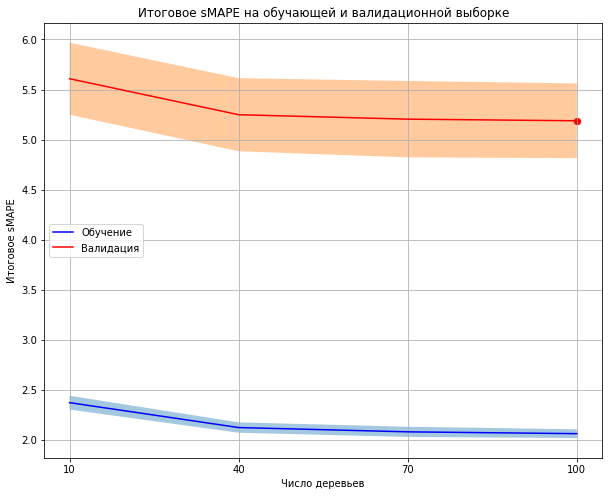

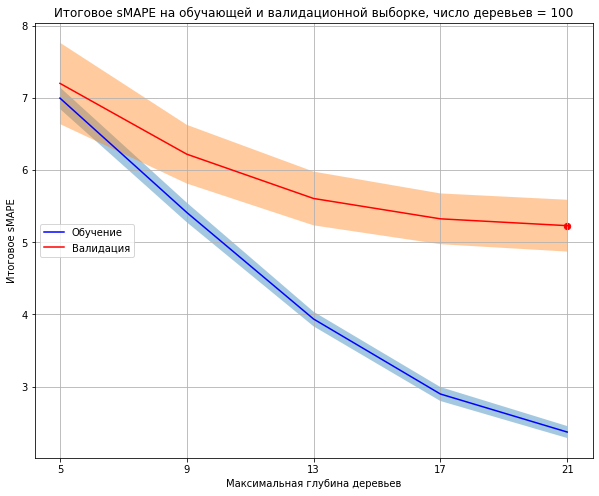


Кросс-валидация на уменьшенных выборках после корреляционного анализа
Лучшее итоговое sMAPE на обучающей выборке: 2.309
Лучшее итоговое sMAPE на валидационной выборке: 5.198

Лучшие параметры модели "случайный лес":
Число деревьев = 100
Максимальная глубина деревьев = 21


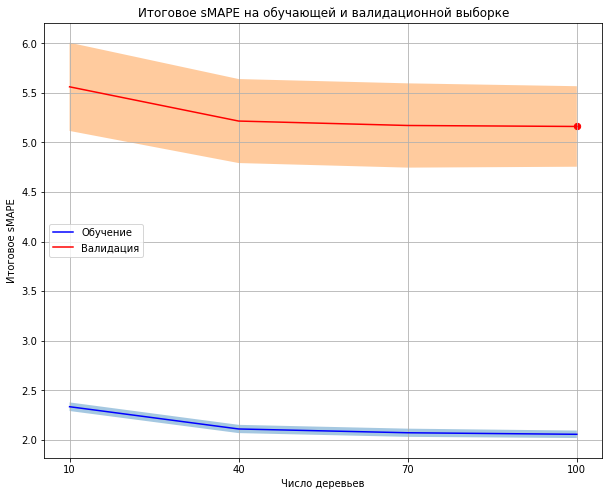

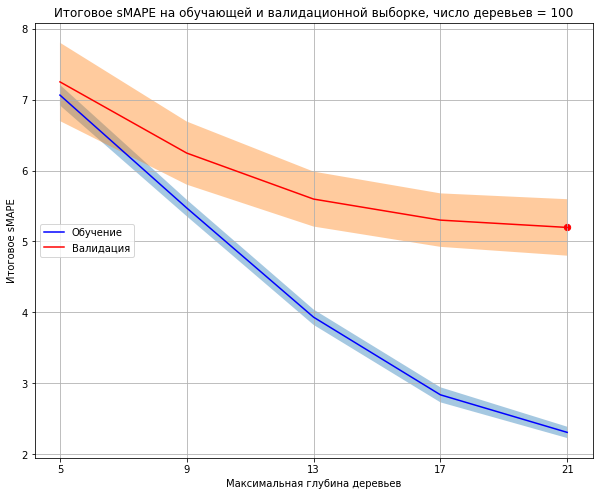


Кросс-валидация на уменьшенных выборках после рекурсивного удаления признаков
Лучшее итоговое sMAPE на обучающей выборке: 2.402
Лучшее итоговое sMAPE на валидационной выборке: 5.435

Лучшие параметры модели "случайный лес":
Число деревьев = 100
Максимальная глубина деревьев = 21


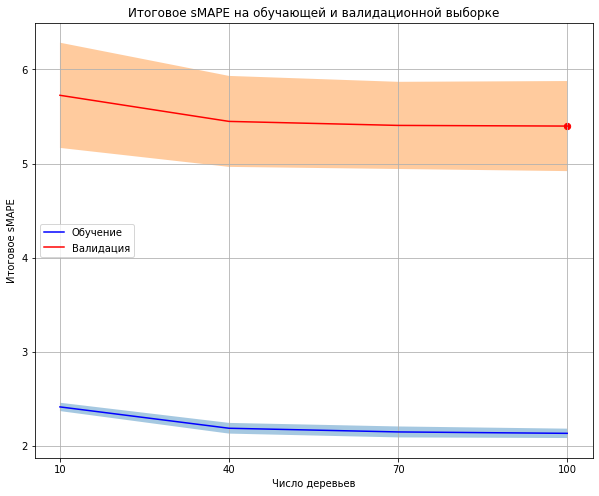

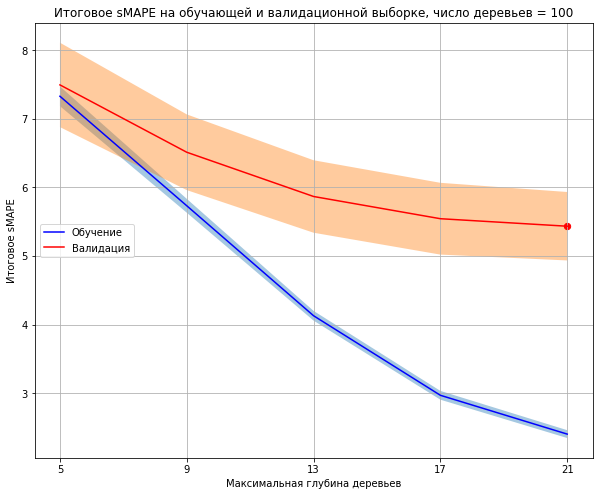

In [38]:
rfr_list = []

for desc, feat in features_train_test_dict.items():
    print_bold('Кросс-валидация на ' + desc)
    best_model = random_forest_tuning_hyperparameters(feat[0], target_train)
    rfr_list.append(best_model)
    print()

Качество достаточно хорошее, но видно, что на каждой выборке модель переобучается: метрика на тренировочных частях в два раза меньше, чем на валидационных. Поэтому необходимо найти ещё один регуляризатор и уменьшить переобучение без существенной потери в качестве, например, можно использовать минимальное количество объектов в листе.

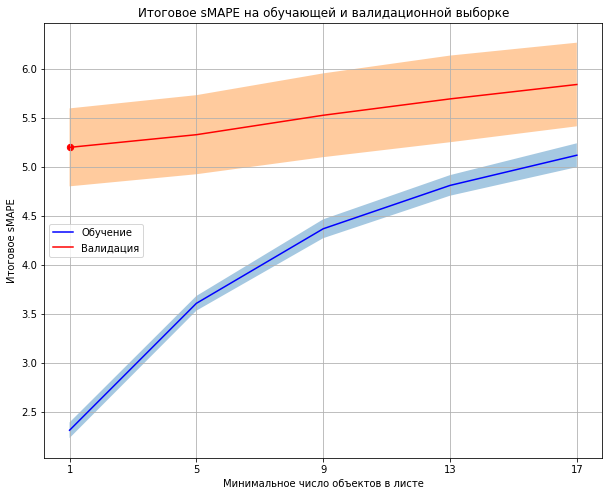

In [39]:
# Инициализируем регрессор "случайный лес"
rfr = RandomForestRegressor(n_estimators=100, max_depth=21, random_state=RANDOM_STATE, n_jobs=-1)

# Зададим набор значений минимального количества объектов в листе min_samples_leaf
rng = range(1, 18, 4)
params = {'min_samples_leaf': rng}

# Инициализируем и проведём кросс-валидацию
rfr_grid = GridSearchCV(
    estimator=rfr,
    param_grid=params,
    cv=kfold,
    scoring=final_symmetric_mean_absolute_percentage_error,
    n_jobs=-1,
    return_train_score=True
)
# Обучим на уменьшенной выборке после корреляционного анализа
rfr_grid.fit(features_train_reduced_by_correlation_test, target_train)

# Выведем результаты обучения и тестирования
train_score = -rfr_grid.cv_results_['mean_train_score']
train_std = rfr_grid.cv_results_['std_train_score']
test_score = -rfr_grid.cv_results_['mean_test_score']
test_std = rfr_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(rfr_grid.best_params_['min_samples_leaf'], test_score.min(), c='red', s=40)
plt.legend(loc='center left')
plt.xticks(ticks=x)
plt.xlabel('Минимальное число объектов в листе')
plt.ylabel('Итоговое sMAPE')
plt.title('Итоговое sMAPE на обучающей и валидационной выборке')
plt.grid(True)

Здесь видно, что если взять минимальное число объектов в листе, равное 17, то можно уменьшить переобучение почти в 4 раза, при этом качество снизится всего на 1% по метрике sMAPE.

## Тестирование моделей

Выведем результаты тестирования линейных моделей и случайного леса на трёх видах выборок.

In [40]:
test_smape_list = []

for desc, feat in features_train_test_dict.items():
    lin_reg = LinearRegression(normalize=True, n_jobs=-1)
    lin_reg.fit(feat[0], target_train)
    
    final_smape = final_SMAPE(target_test, lin_reg.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE линейной регрессии на ' + desc + ': {:.3f}'.format(final_smape))

Итоговое sMAPE линейной регрессии на полных выборках: 7.485
Итоговое sMAPE линейной регрессии на уменьшенных выборках после корреляционного анализа: 6.901
Итоговое sMAPE линейной регрессии на уменьшенных выборках после рекурсивного удаления признаков: 7.593


In [41]:
for desc, feat in features_train_test_dict.items():
    elastic_net = ElasticNet(random_state=RANDOM_STATE)
    elastic_net.fit(feat[0], target_train)

    final_smape = final_SMAPE(target_test, elastic_net.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE эластичной сетки на ' + desc + ': {:.3f}'.format(final_smape))

Итоговое sMAPE эластичной сетки на полных выборках: 7.494
Итоговое sMAPE эластичной сетки на уменьшенных выборках после корреляционного анализа: 6.910
Итоговое sMAPE эластичной сетки на уменьшенных выборках после рекурсивного удаления признаков: 7.227


In [42]:
for desc, feat in features_train_test_dict.items():
    rfr = RandomForestRegressor(n_estimators=100, max_depth=21, min_samples_leaf=17, n_jobs=-1, random_state=RANDOM_STATE)
    rfr.fit(feat[0], target_train)
    
    final_smape = final_SMAPE(target_test, rfr.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE случайного леса на ' + desc + ': {:.3f}'.format(final_smape))

Итоговое sMAPE случайного леса на полных выборках: 7.549
Итоговое sMAPE случайного леса на уменьшенных выборках после корреляционного анализа: 7.151
Итоговое sMAPE случайного леса на уменьшенных выборках после рекурсивного удаления признаков: 7.320


Видно, что по качеству выиграла модель линейной регрессии на уменьшенных выборках после корреляционного анализа.

Проверим модели на адекватность: сравним их качество с качеством на тестовой выборке фиктивной регрессионной модели.

In [43]:
strategy_list = ['mean', 'median']

for strategy in strategy_list:
    print_bold('Выбранная фиктивная стратегия: ' + strategy)
    for desc, feat in features_train_test_dict.items():
        dummy_reg = DummyRegressor(strategy=strategy)
        dummy_reg.fit(feat[0], target_train)

        final_smape = final_SMAPE(target_test, dummy_reg.predict(feat[1]))
        print('Итоговое sMAPE фиктивной модели на ' + desc + ': {:.3f}'.format(final_smape))
    test_smape_list.append(final_smape)
    print()

Выбранная фиктивная стратегия: mean
Итоговое sMAPE фиктивной модели на полных выборках: 8.140
Итоговое sMAPE фиктивной модели на уменьшенных выборках после корреляционного анализа: 8.140
Итоговое sMAPE фиктивной модели на уменьшенных выборках после рекурсивного удаления признаков: 8.140

Выбранная фиктивная стратегия: median
Итоговое sMAPE фиктивной модели на полных выборках: 7.652
Итоговое sMAPE фиктивной модели на уменьшенных выборках после корреляционного анализа: 7.652
Итоговое sMAPE фиктивной модели на уменьшенных выборках после рекурсивного удаления признаков: 7.652



Качество моделей немного лучше, чем у фиктивной. Построим график, чтобы понять наверняка: адекватны ли модели или нет.

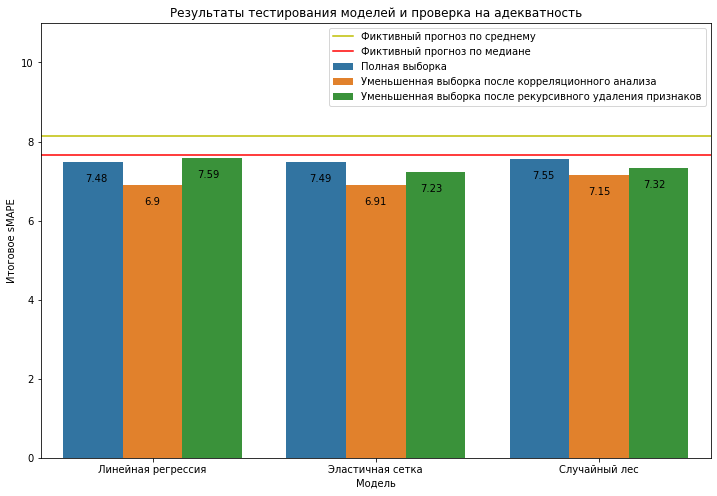

In [44]:
score_df = pd.DataFrame(
    {'model': ['Линейная регрессия']*3 + ['Эластичная сетка']*3 + ['Случайный лес']*3,
     'features': ['Полная выборка',
                  'Уменьшенная выборка после корреляционного анализа',
                  'Уменьшенная выборка после рекурсивного удаления признаков'] * 3,
     'smape': test_smape_list[:-2]
    }
)

plt.figure(figsize=(12, 8))
g = sns.barplot(x='model', y='smape', hue='features', data=score_df)
plt.axhline(y=test_smape_list[-2], color='y', linestyle='-', label='Фиктивный прогноз по среднему')
plt.axhline(y=test_smape_list[-1], color='r', linestyle='-', label='Фиктивный прогноз по медиане')

for index, row in score_df.iterrows():
    x = (index + index // 3 - 1) / 4
    g.text(x=x, y=row.smape-0.5, s=round(row.smape, 2), color='black', ha='center')

plt.legend()
plt.title('Результаты тестирования моделей и проверка на адекватность')
plt.xlabel('Модель')
plt.ylabel('Итоговое sMAPE')
plt.ylim(0, 11);

Видно, что все модели показали адекватный результат, соответственно лучший результат линейной регрессии тоже можно считать адекватным.

## Вывод

* Написана функция для вычисления итогового sMAPE.
* Обучены модели линейной регрессии, эластичной сетки и случайного леса. Проведена перекрёстная проверка для надёжности результатов, в качестве метрики использовано sMAPE.
* Все модели показали результат sMAPE меньше 9%, лучше всех обучилась модель случайного леса, что не случайно, так как с настройками по умолчанию случайный лес склонен переобучаться, что может привести к плохим результатам на тесте.
* Произведён подбор гиперпараметров для модели случайный лес. Результаты:
    * число деревьев - 100;
    * максимальная глубина деревьев - 21;
    * минимальное число объектов в листе - 17.
* На тестовой выборке лучший результат показала **линейная регрессия** на уменьшенной выборке после корреляционного анализа, **sMAPE = 6.9%**.
* Качество моделей было проверено на адекватность, все результаты оказались адекватными.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке